In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv



In [2]:
# ['testCompleteC45W1P50-0-20240109-11:11:16-14684', 'vector', 'J_Network.queuer', 'jobsQueueLen:vector', '', '', '', '', '', '', '', '', '', '........' , '0 1 .......'

# FILE : testExpP50_25_all.csv
# ROW : [ 'testExpP50-1-20240110-18:12:49-3640',  'vector', 'J_Network.queuer', 'jobsQueueLen:vector', '', '', '', '', '', '', '', '', '', '...tempi...' , '0 1 .......' ]


#   USE ESPONENTIAL OR CONSTANT
use_exp = True

if use_exp == True:
    distribution = "Exp"
    dddistribution = "exp"
elif use_exp == False:
    distribution = "Con"
    dddistribution = "con"

#   target_tso = ["50"]
detailed = True
if detailed == True :
    target_tso = list(range(24, 51+1, 3) )
else :
    if use_exp == True :
        target_tso = ["25","30","35", "40", "45", "50"]
    elif use_exp == False:
        target_tso = ["25","30","35", "40", "45", "50"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30

use_all = False


# PROBABILITY
probability = 50

In [3]:
print(target_tso)

[24, 27, 30, 33, 36, 39, 42, 45, 48, 51]


In [6]:
#   run,type,module,name,attrname,attrvalue,vectime,vecvalue
#   



#   target_tso = ["25"]
    
r1 = "vector"
r2 = "J_Network.server_"
r3 = "completedJob:vector"
server_names = [0, 1]

general_array = []
for srvn in range(0, len(server_names)):
    jrespTime_all_tsos = []
    for tso_this_iter in range(0, len(target_tso), 1) :
        #   print(tso_this_iter)
        jrespTime_all_this_tso = []

        file_name_csv = f'test{distribution}P{probability}_{target_tso[tso_this_iter]}_all.csv'
        if detailed == True :
            file_name_csv = f'{dddistribution}Step3ConfP{probability}CompJVec{target_tso[tso_this_iter]}.csv'

        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                    print("hit row : ", row)
                    #   print("listed row : ", rigaTarget)
                    #   print("len : ", len(rigaTarget))    #   15 .
                    #   print("13 : ", rigaTarget[13])  #   13 :  88842.22 92268.143 94401.199 97374.126 102381.932
                    #   print("14 : ", rigaTarget[14])  #   14 :  1733.82 1115.235 343.087 879.005 3157.046 1277.006
                    #   print("len 13 : ", len(rigaTarget[13]) )
                    #   print("len 14 : ", len(rigaTarget[14]) )
                    
                    tempi_risposta = rigaTarget[-1].split(" ")
                    #   numeri = rigaTarget[-1].split(" ")
                    #   for cont in range(0, len(tempi)):
                    #       jrespTime_all_this_tso.append( ( int(numeri[cont]) , float(tempi[cont]) ) )
                    for cont in range(0, len(tempi_risposta)):
                        jrespTime_all_this_tso.append(tempi_risposta[cont])
                    
                    if use_all == False:
                        print("break")
                        break

        jrespTime_all_tsos.append(jrespTime_all_this_tso)
        print(f'{file_name_csv} _ len : {len(jrespTime_all_tsos[tso_this_iter])}' )
    general_array.append(jrespTime_all_tsos)

# now we have all tsos of all !


hit row :  ['expStep3ConfP50-0-20240112-12:13:05-18168', 'vector', 'J_Network.server_0', 'completedJob:vector', '', '', '89334.102 91482.271 94901.957 98202.949 99600.461 101536.138 104892.38 107228.653 111011.1 114854.018 117514.616 119140.763 119951.98 120501.236 125238.203 126607.968 129995.529 132318.49 134130.985 139099.312 141436.895 141978.391 142445.725 150256.106 151488.033 155156.227 158040.015 162760.403 170643.178 170771.165 174889.373 174946.74 176772.351 177263.291 178768.124 182525.026 184123.806 184272.883 185567.591 186354.751 200010.929 205066.191 213470.214 217278.202 217987.025 222158.949 222714.49 223822.075 224042.814 227178.75 229633.143 232224.486 237634.294 242774.779 242824.846 244953.752 251411.854 269841.886 271398.067 278333.399 279712.535 282095.59 282946.39 285188.789 290974.514 291571.447 292156.394 294082.218 296466.866 299912.009 301175.598 306156.901 309521.991 310206.618 311406.16 315584.478 317735.525 318025.667 322774.876 328857.227 332503.704 3340

In [7]:
#   for srvn in range(0, len(server_names)):
#       for tso_this_iter in range(0, len(target_tso), 1) :
#           for row in reader:
#               ...
#               if use_all == False:
#                   print("break")
#                   break


print(len(general_array))       #   2
print(general_array[0])
print(len(general_array[0]))    #   6
print(general_array[0][0])

2
[['1070.625', '329.363', '843.845', '3030.764', '375.575', '39.988', '1100.82', '1598.516', '3532.272', '777.731', '879.873', '1177.931', '823.627', '217.833', '4030.529', '317.913', '2169.839', '2718.698', '3791.863', '6737.858', '5191.066', '4853.159', '140.246', '1697.333', '1051.384', '3010.488', '4860.118', '3240.08', '2544.41', '766.496', '2548.262', '1133.878', '459.212', '268.02', '87.942', '3031.06', '3922.237', '2480.814', '2736.338', '1712.93', '1603.71', '4561.141', '764.161', '1096.963', '316.925', '1695.249', '492.435', '545.889', '556.108', '1670.341', '2202.204', '3839.064', '766.001', '26.579', '52.05', '1997.095', '1408.674', '6476.127', '1821.874', '1985.737', '510.52', '473.934', '1216.435', '2409.653', '361.712', '156.89', '109.72', '855.381', '912.157', '3668.438', '145.608', '500.535', '3425.713', '488.681', '183.247', '200.585', '1071.386', '28.162', '125.752', '1635.555', '3581.633', '342.411', '3474.634', '3228.651', '3723.143', '2715.685', '1264.328', '1088

In [8]:

#   #   for i in jQueueLen_vector:
#   #       nums.append( int(i[0]))
#   #   print(nums)

general_nums = []
for srvn in range(0, len(server_names)):
    nums_all_tsos = []
    for tso_this_iter in range(0, len(target_tso), 1) :
        nums = []
        for i in range(0, len(general_array[srvn][tso_this_iter]) ):
            #   print( general_array[srvn][tso_this_iter][i] )
            #   print(int(general_array[srvn][tso_this_iter][i]))
            #   #   !!! for histogram we need numbers not strings ! 
            nums.append( float( general_array[srvn][tso_this_iter][i]) )
        nums_all_tsos.append(nums)
        print(f'testExp_{target_tso[tso_this_iter]} len : {len(nums_all_tsos[tso_this_iter])}' )
    general_nums.append(nums_all_tsos)
# got all nums of all tsos

print(general_nums)

testExp_24 len : 1719
testExp_27 len : 1743
testExp_30 len : 1769
testExp_33 len : 1798
testExp_36 len : 1800
testExp_39 len : 1824
testExp_42 len : 1834
testExp_45 len : 1848
testExp_48 len : 1803
testExp_51 len : 1703
testExp_24 len : 1061
testExp_27 len : 1037
testExp_30 len : 1012
testExp_33 len : 983
testExp_36 len : 980
testExp_39 len : 957
testExp_42 len : 943
testExp_45 len : 928
testExp_48 len : 902
testExp_51 len : 853
[[[1070.625, 329.363, 843.845, 3030.764, 375.575, 39.988, 1100.82, 1598.516, 3532.272, 777.731, 879.873, 1177.931, 823.627, 217.833, 4030.529, 317.913, 2169.839, 2718.698, 3791.863, 6737.858, 5191.066, 4853.159, 140.246, 1697.333, 1051.384, 3010.488, 4860.118, 3240.08, 2544.41, 766.496, 2548.262, 1133.878, 459.212, 268.02, 87.942, 3031.06, 3922.237, 2480.814, 2736.338, 1712.93, 1603.71, 4561.141, 764.161, 1096.963, 316.925, 1695.249, 492.435, 545.889, 556.108, 1670.341, 2202.204, 3839.064, 766.001, 26.579, 52.05, 1997.095, 1408.674, 6476.127, 1821.874, 1985.737

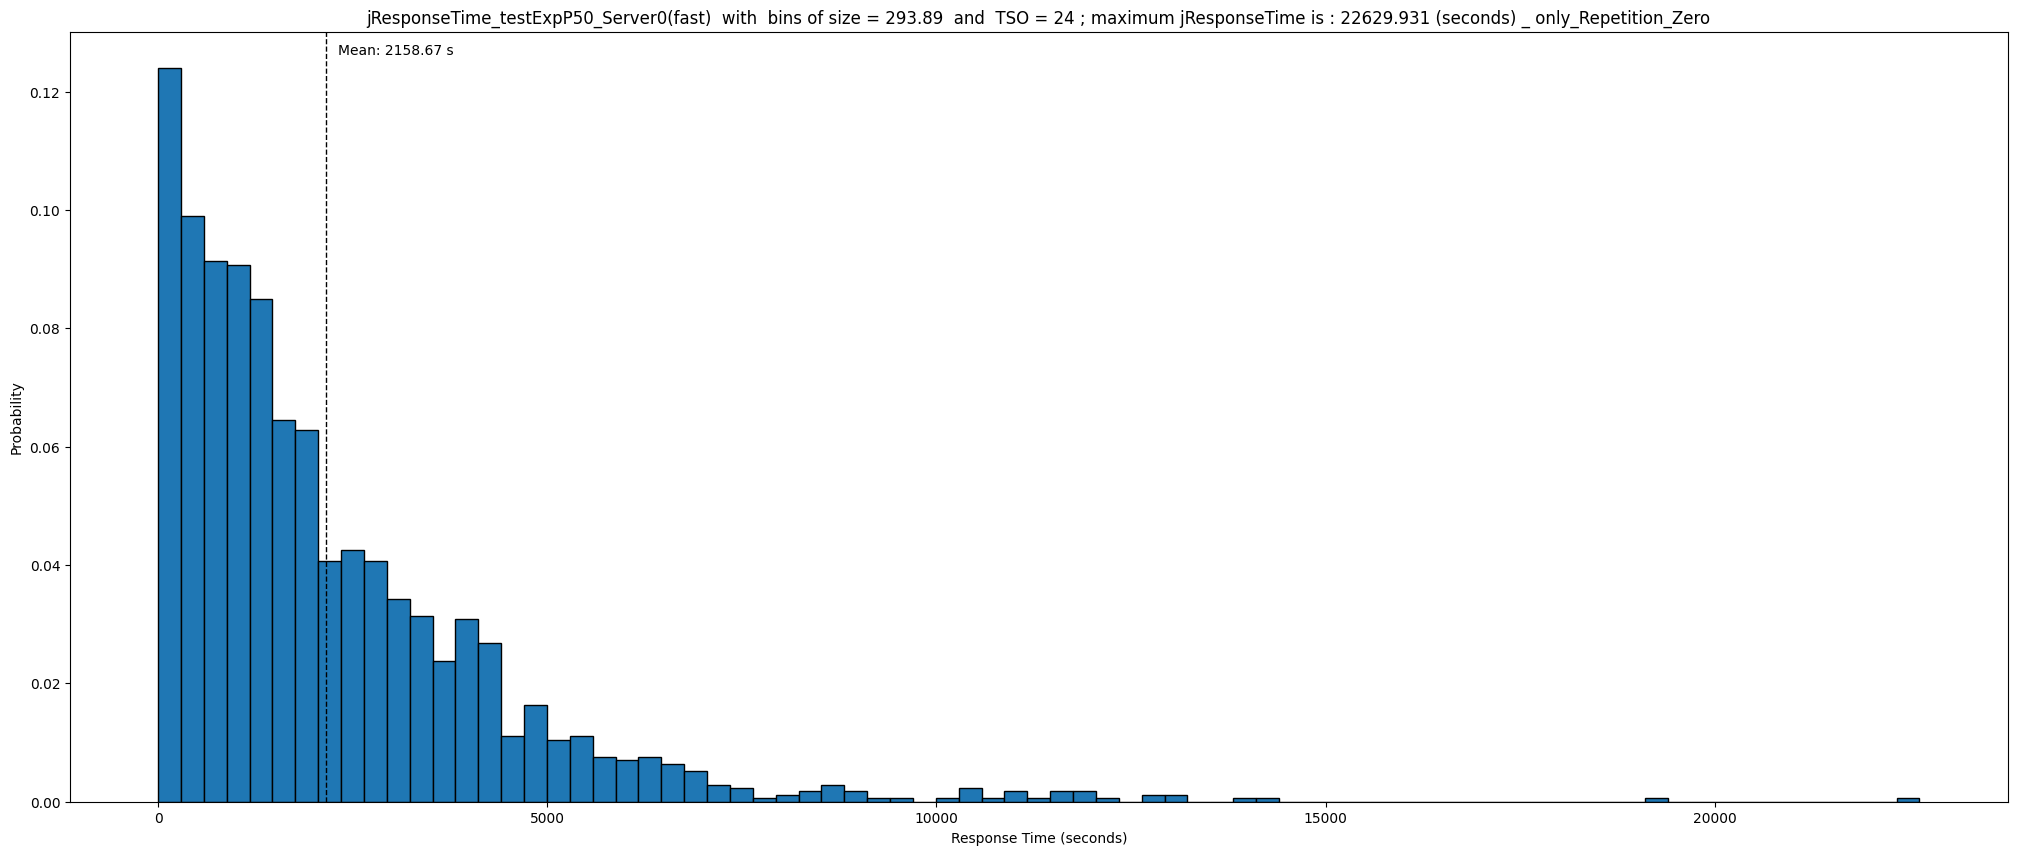

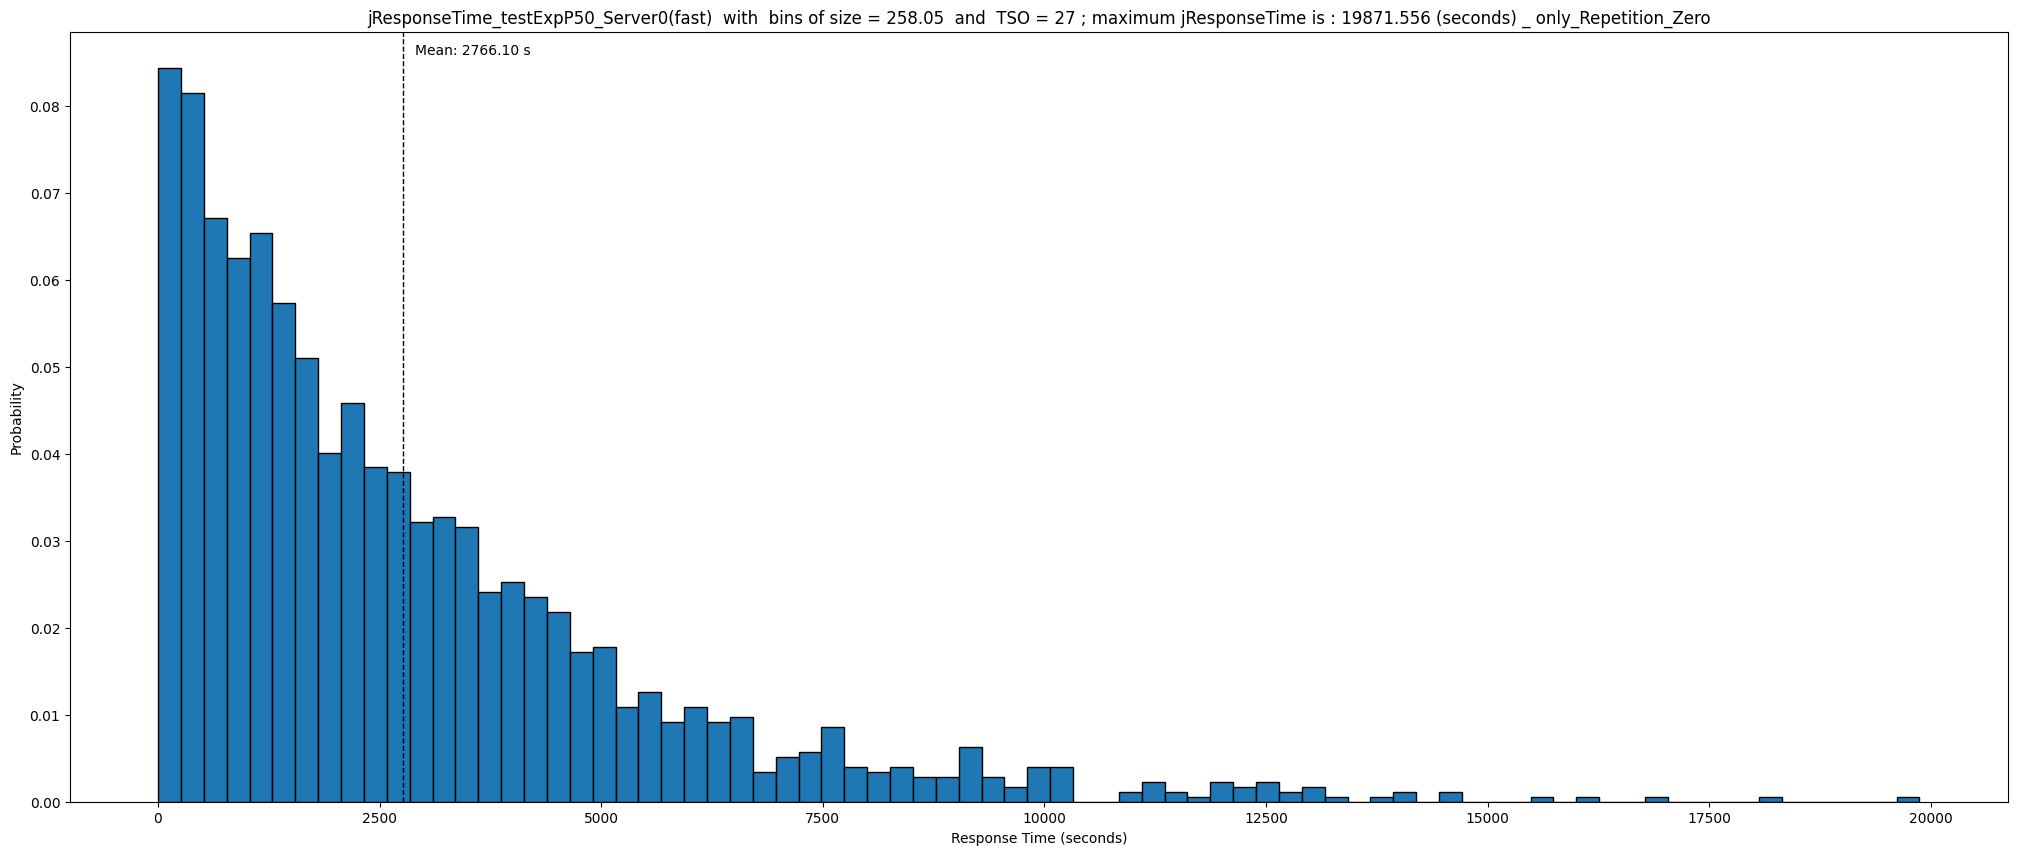

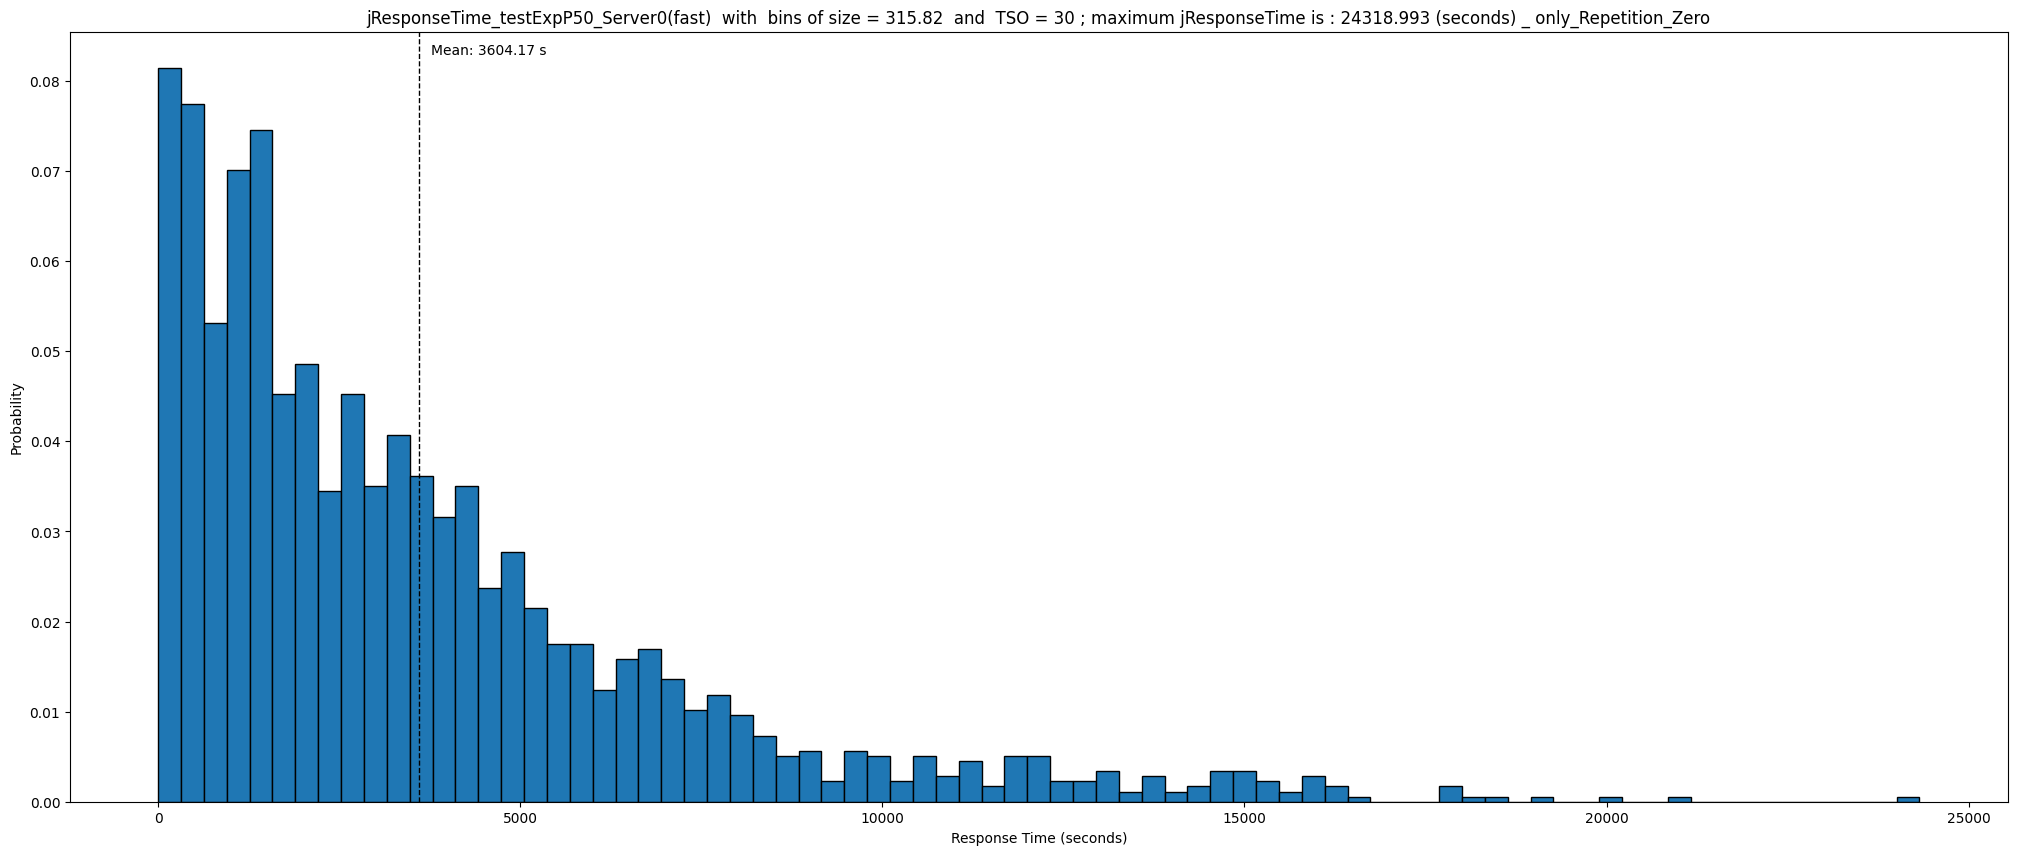

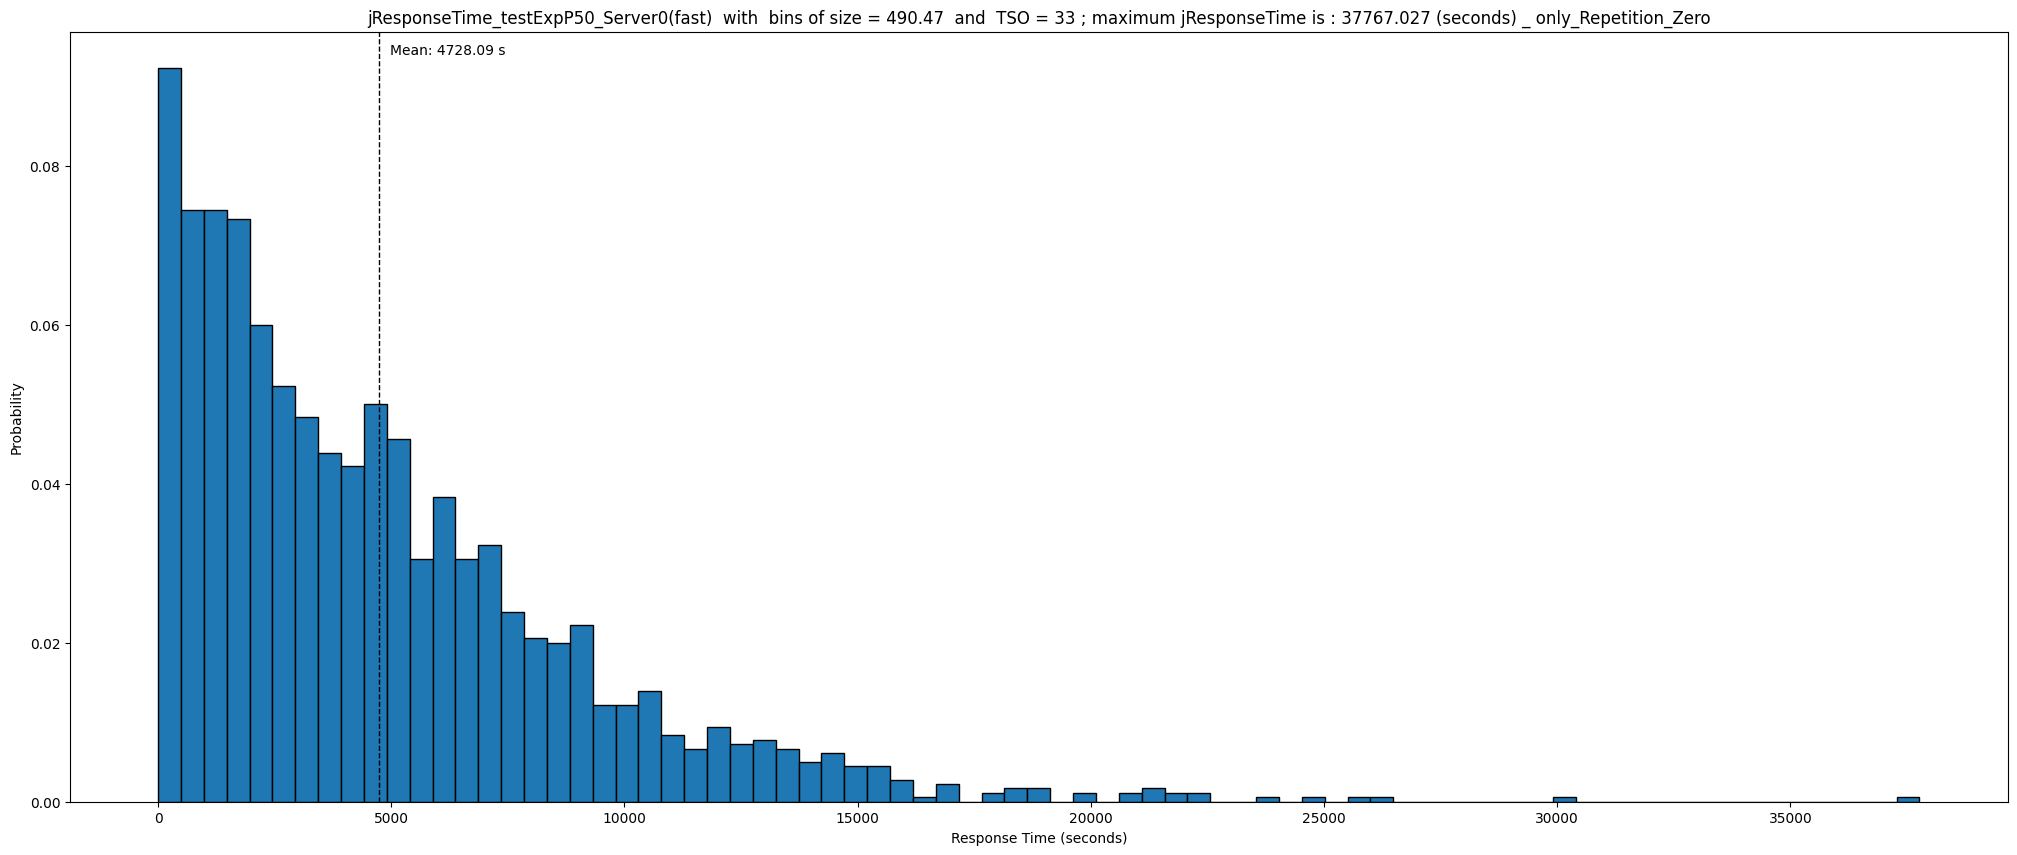

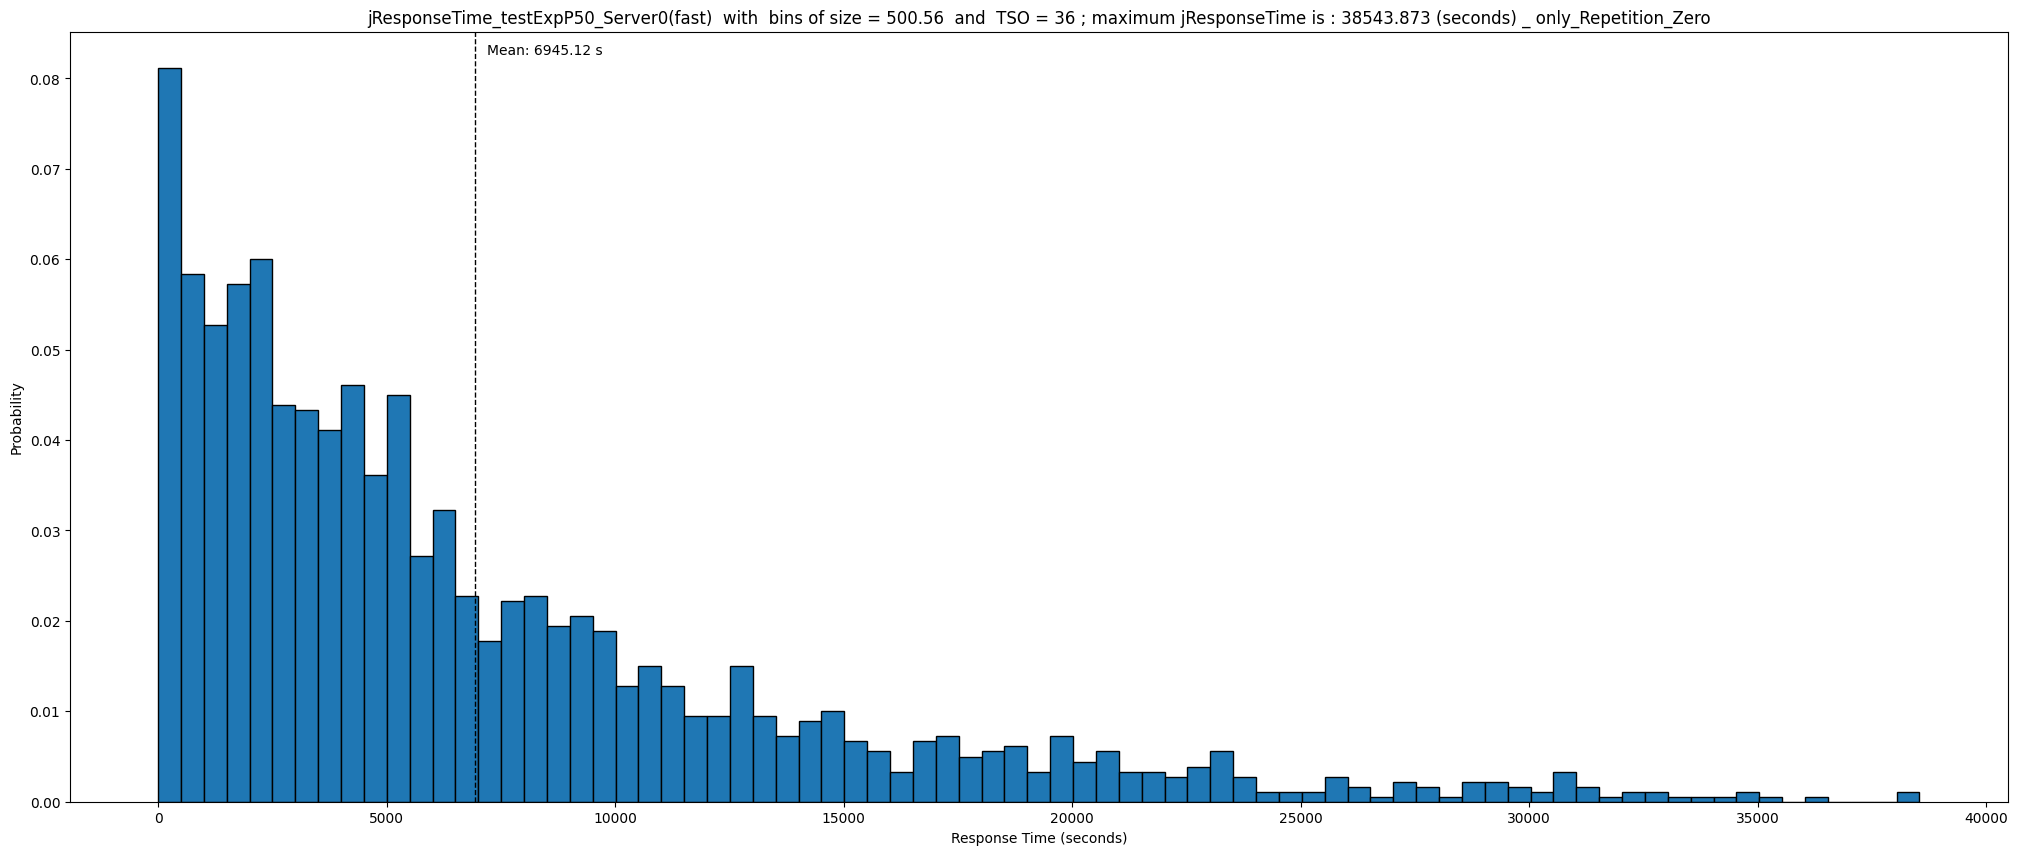

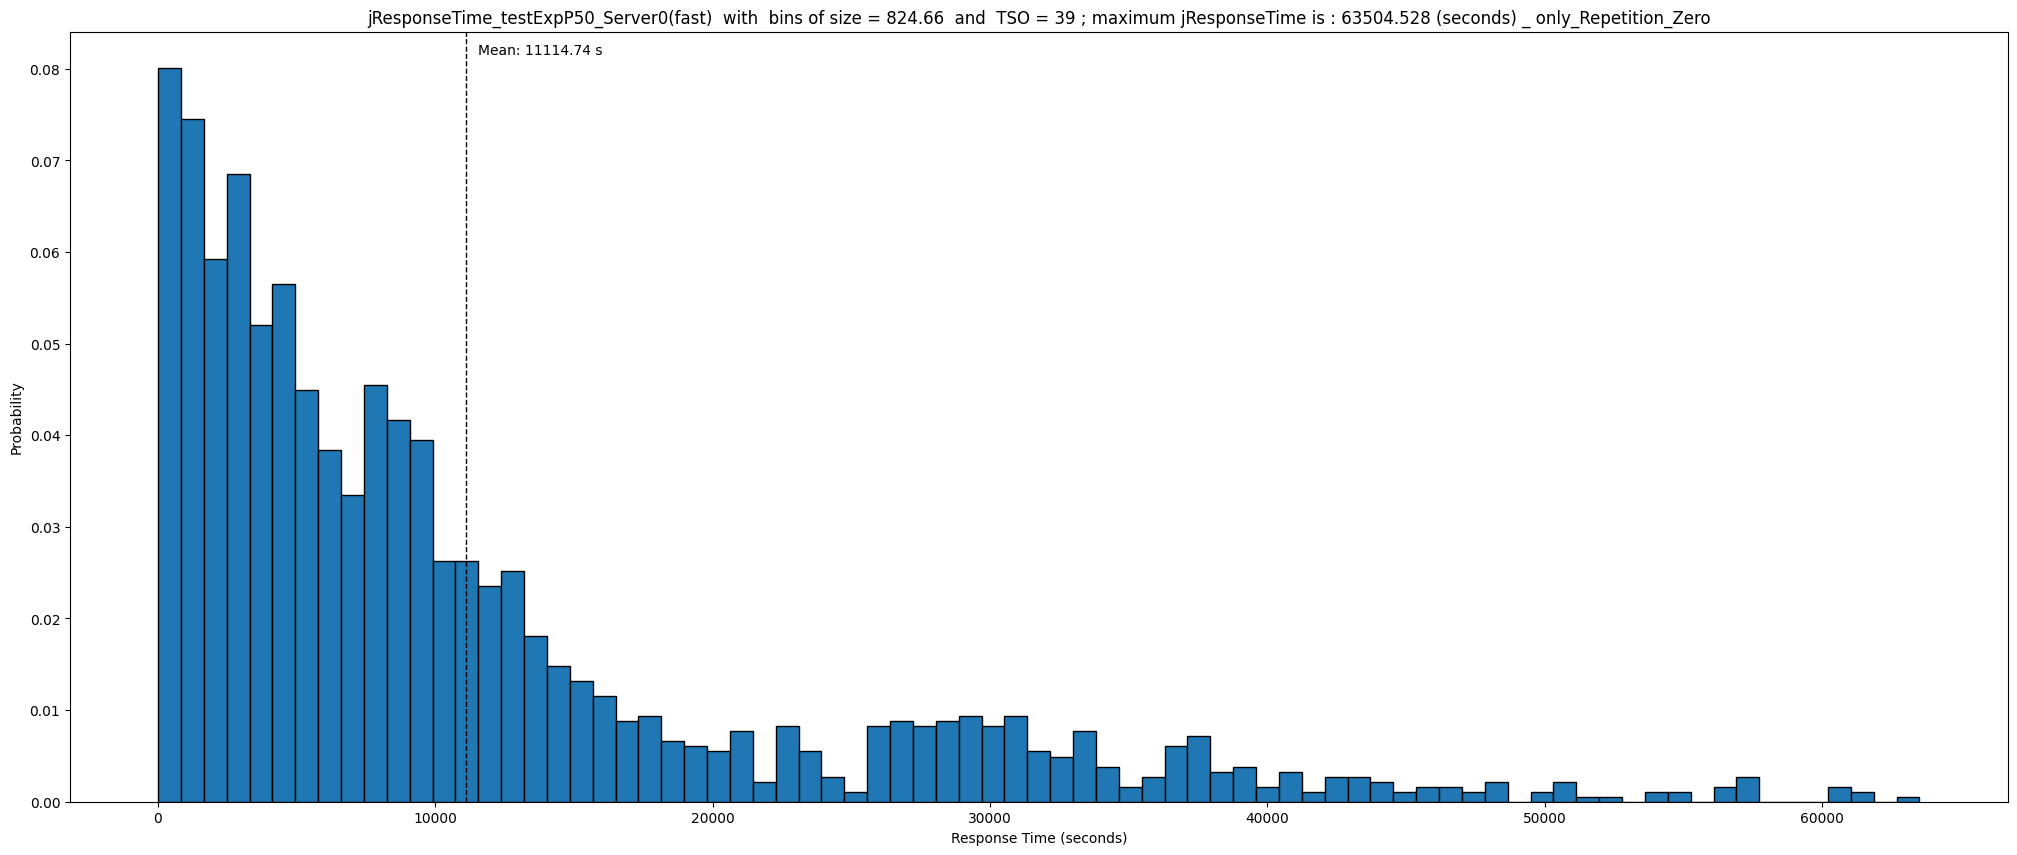

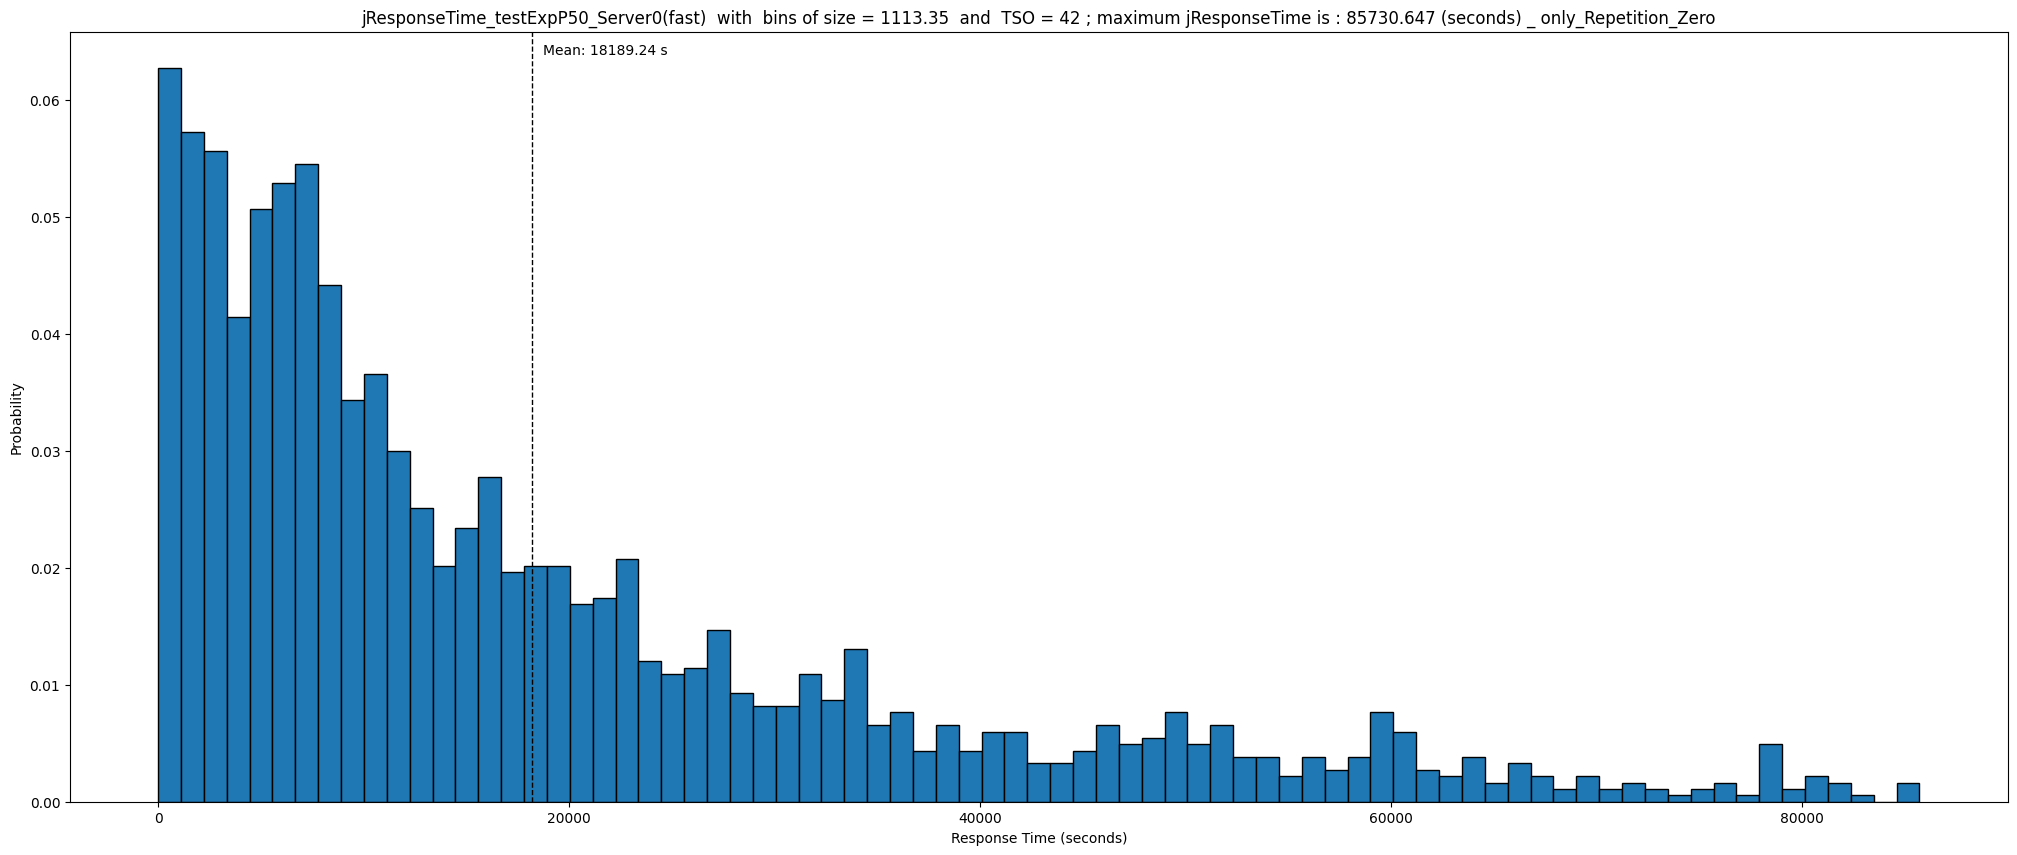

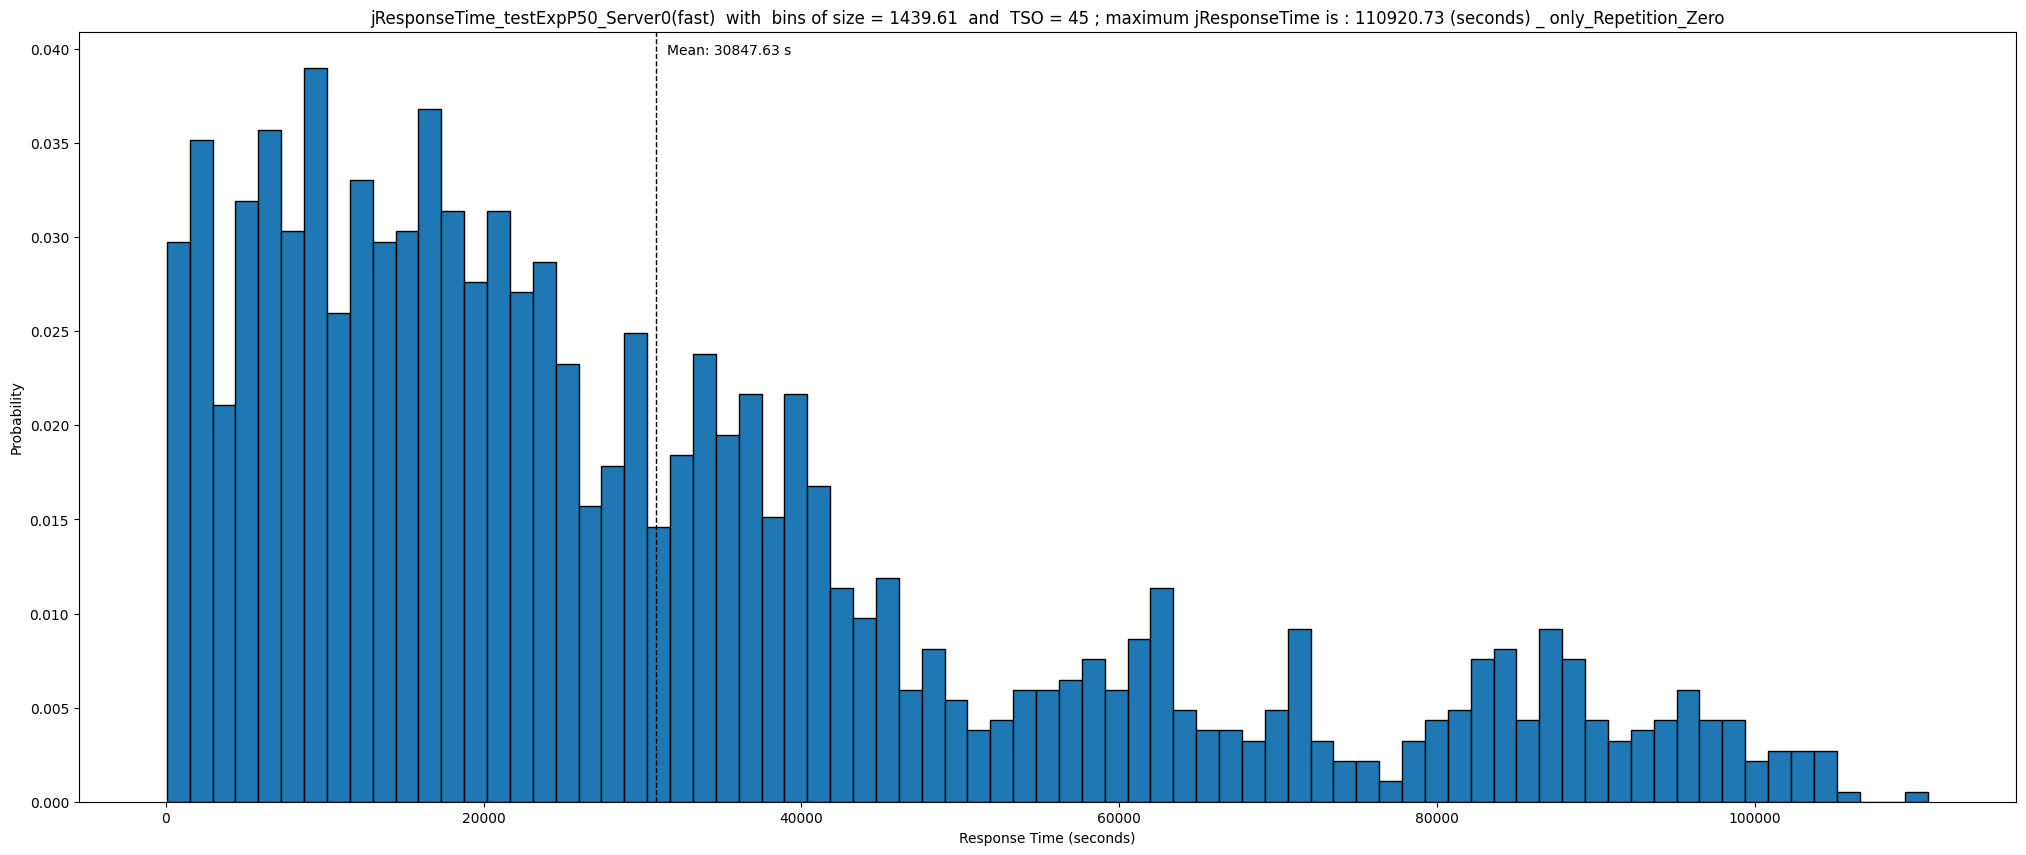

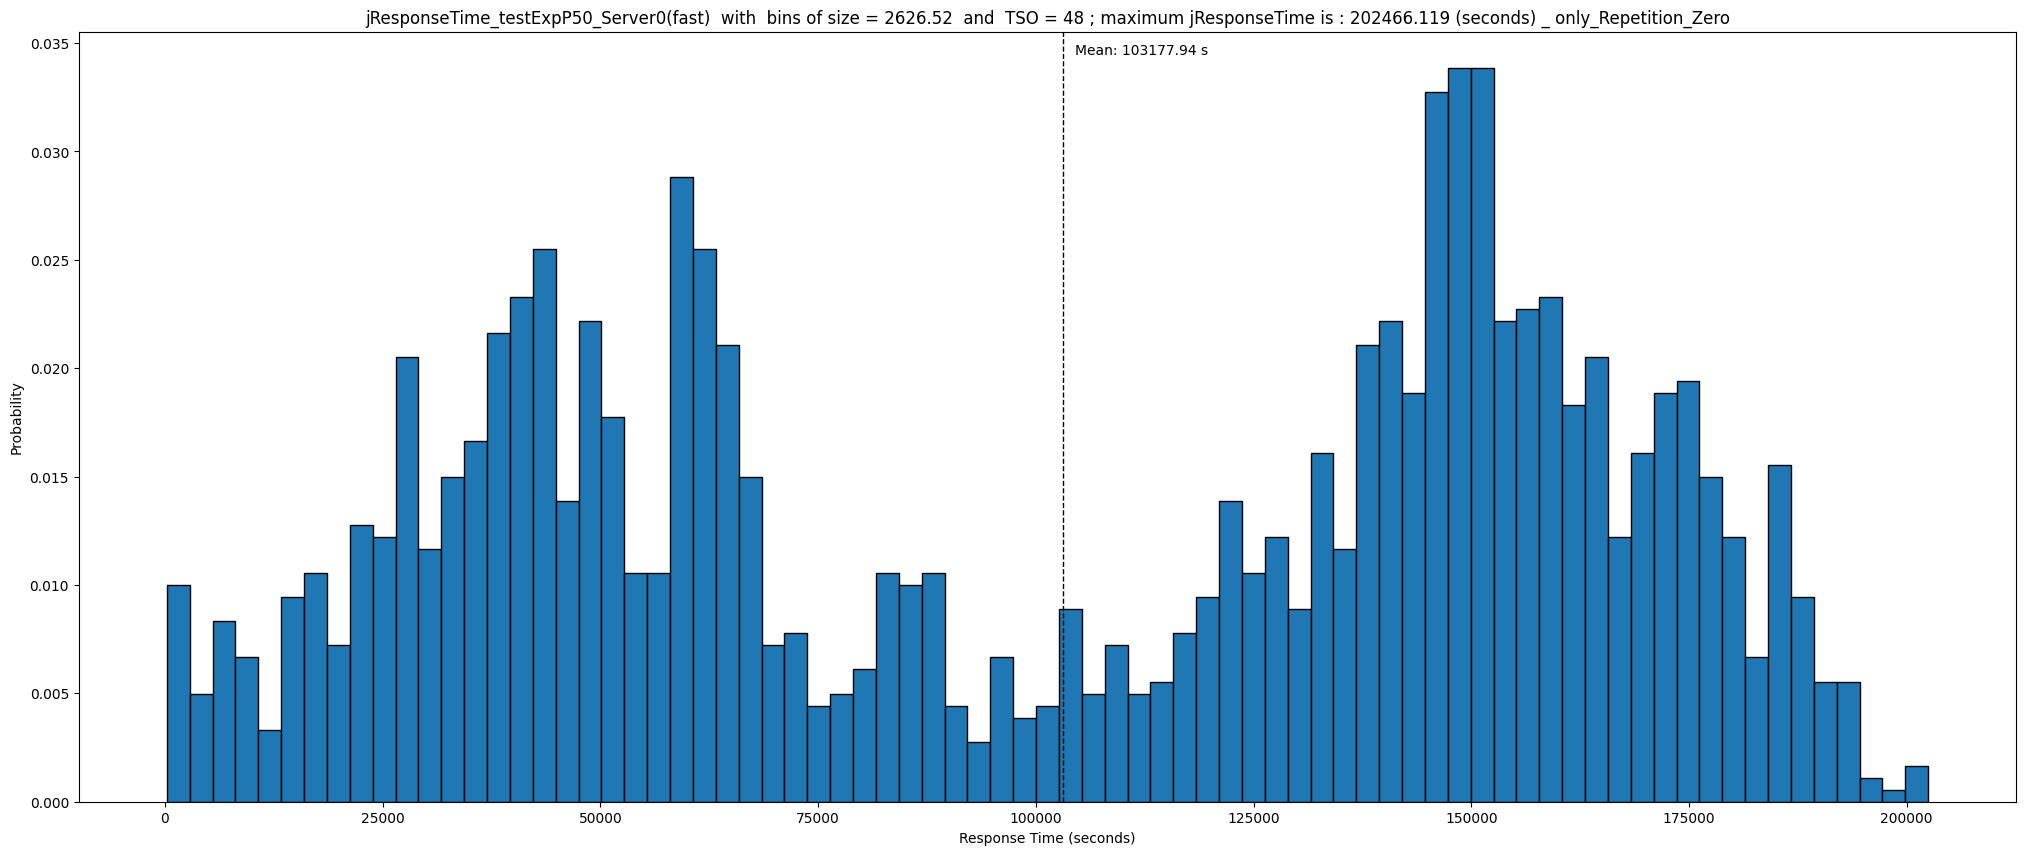

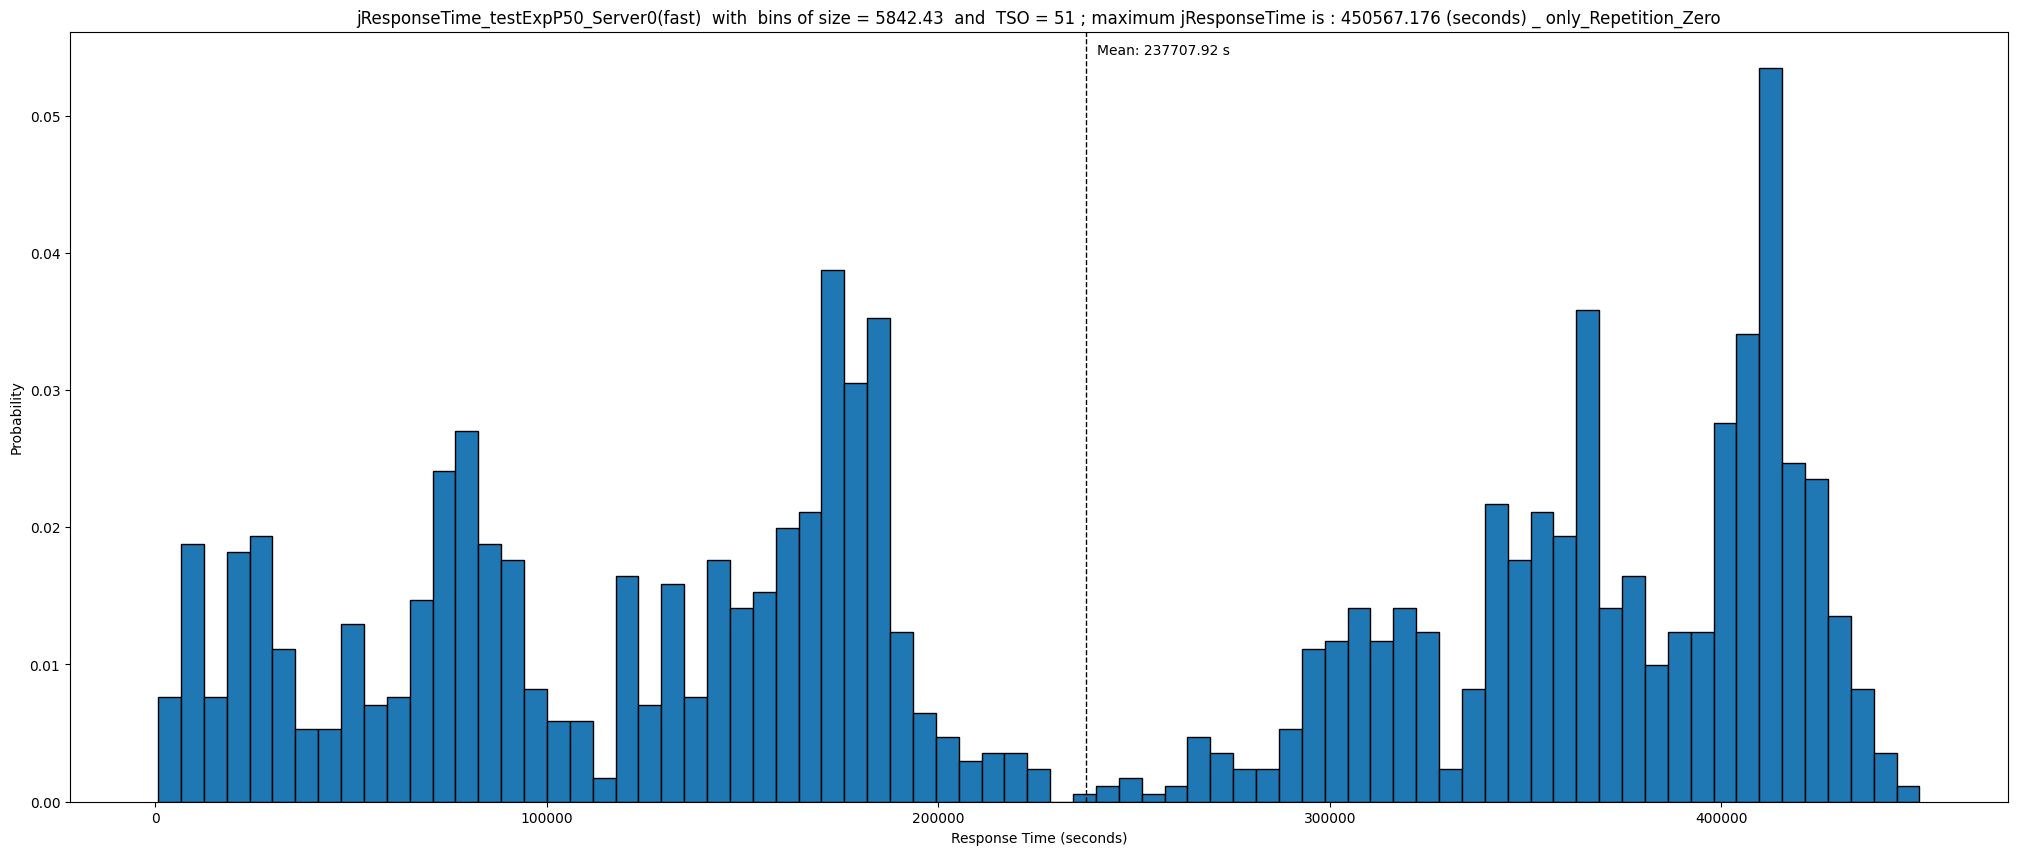

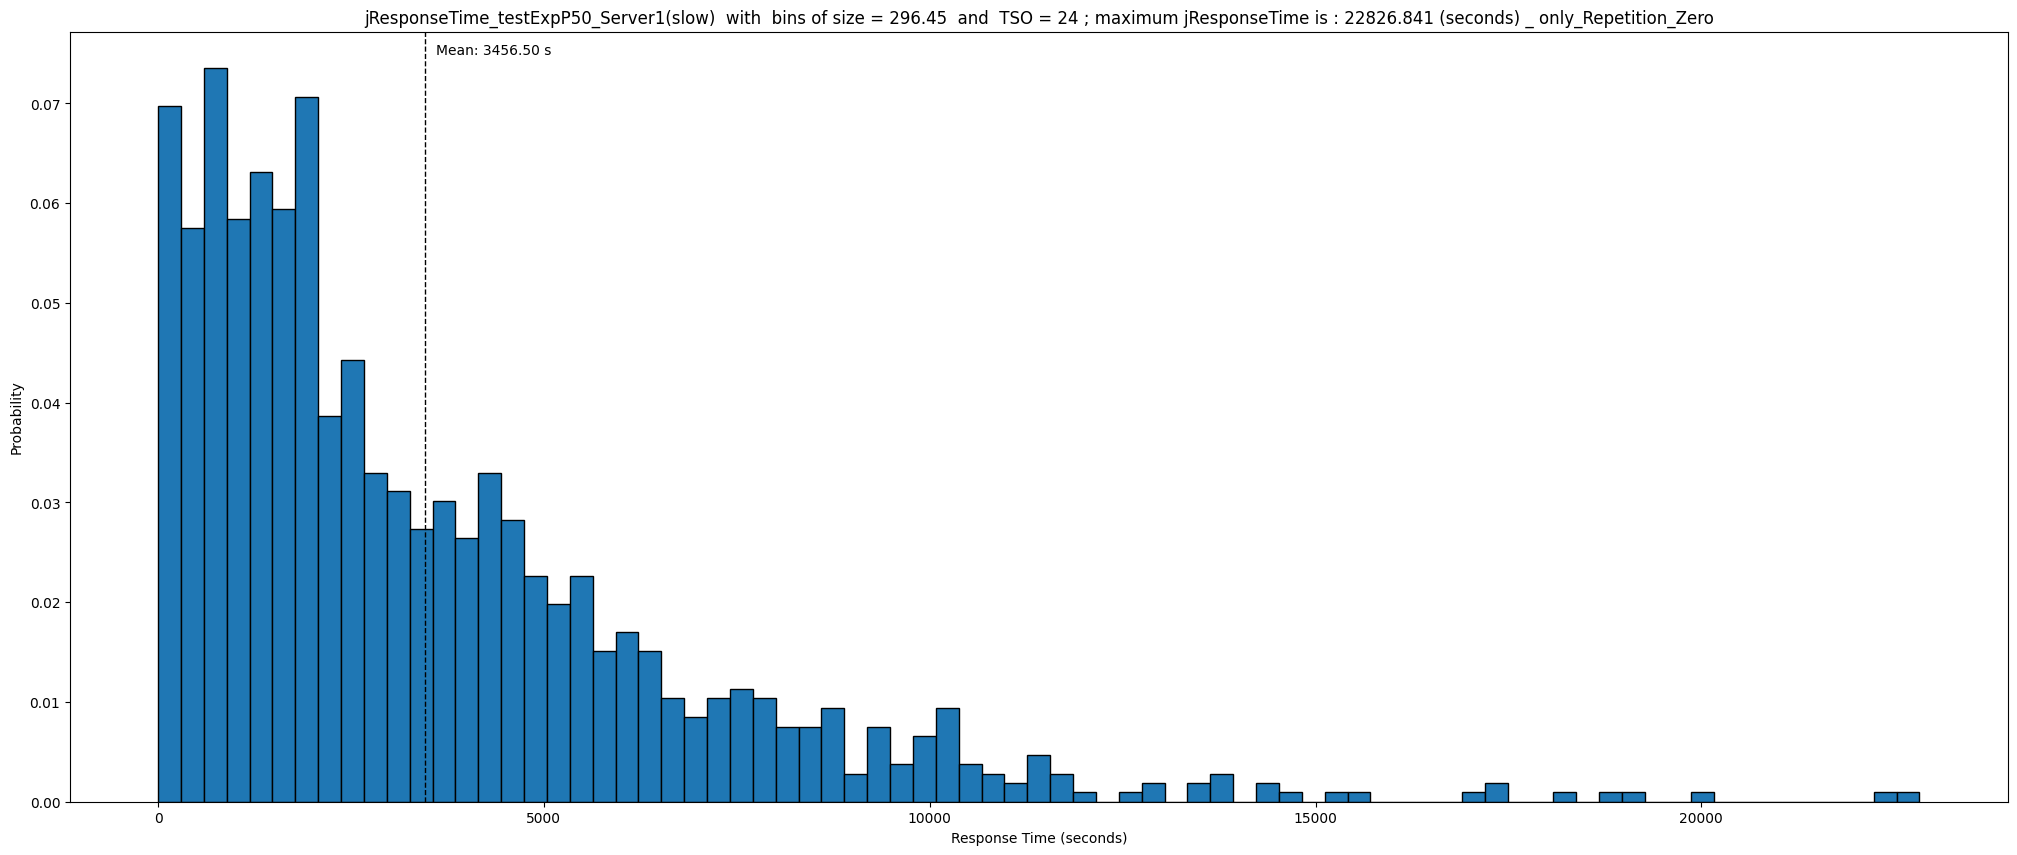

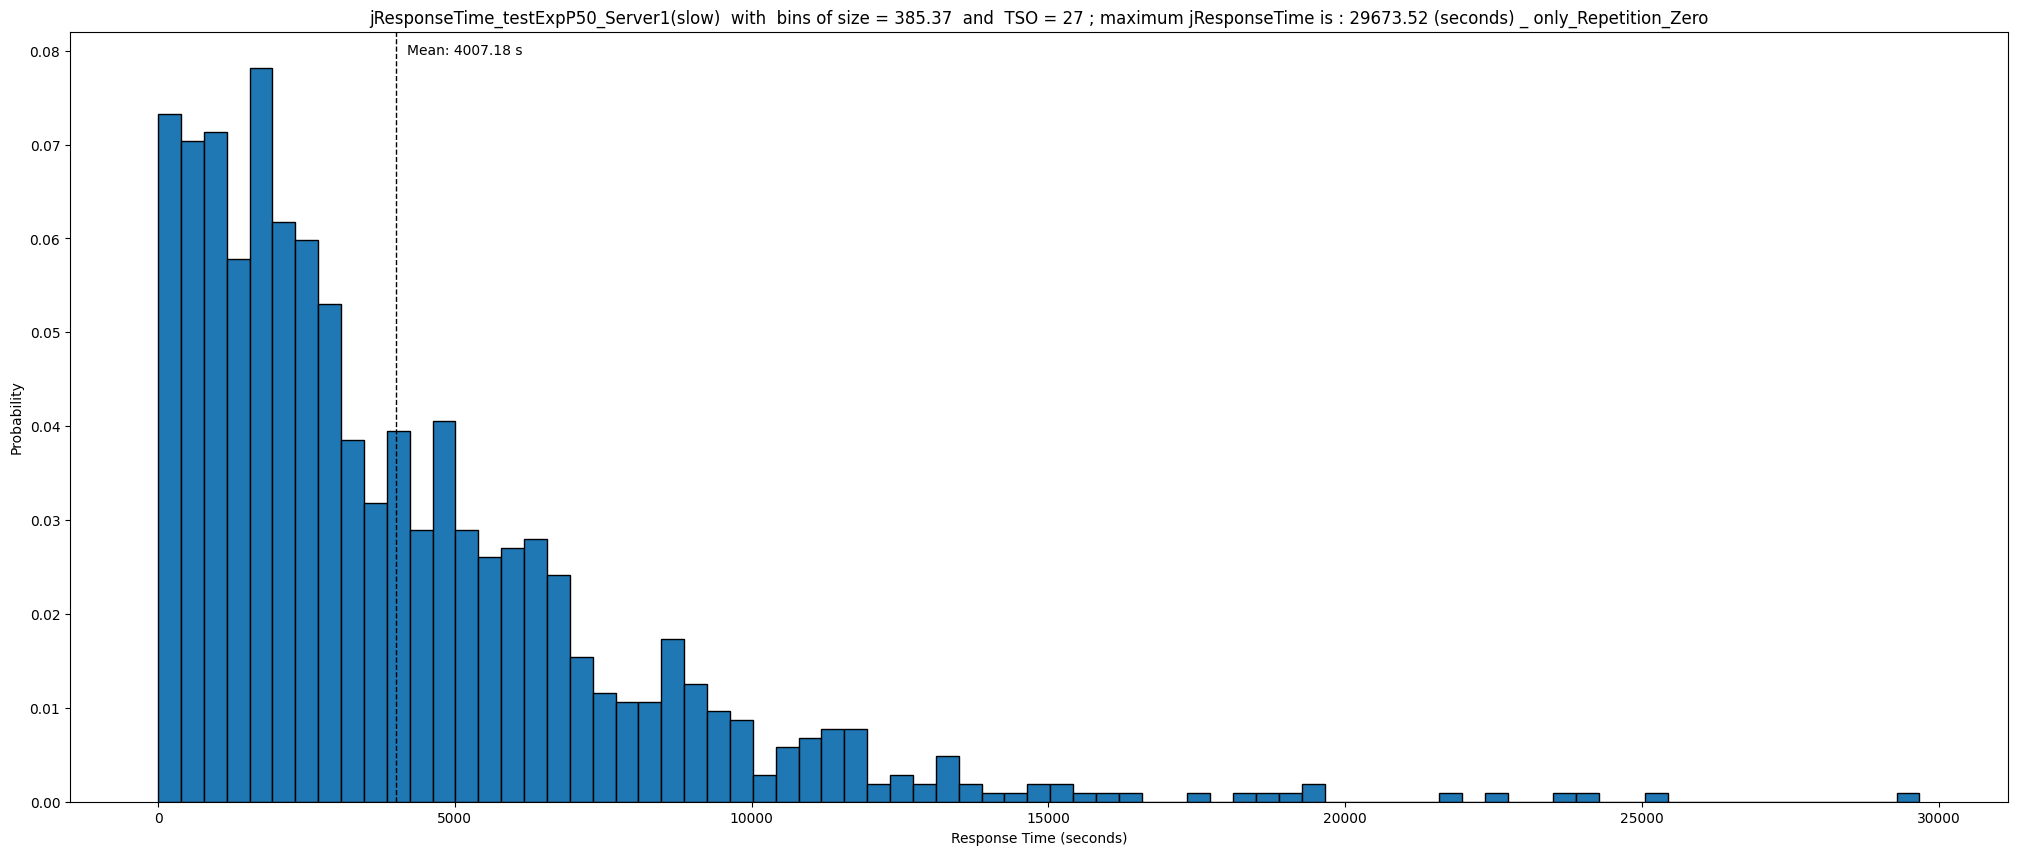

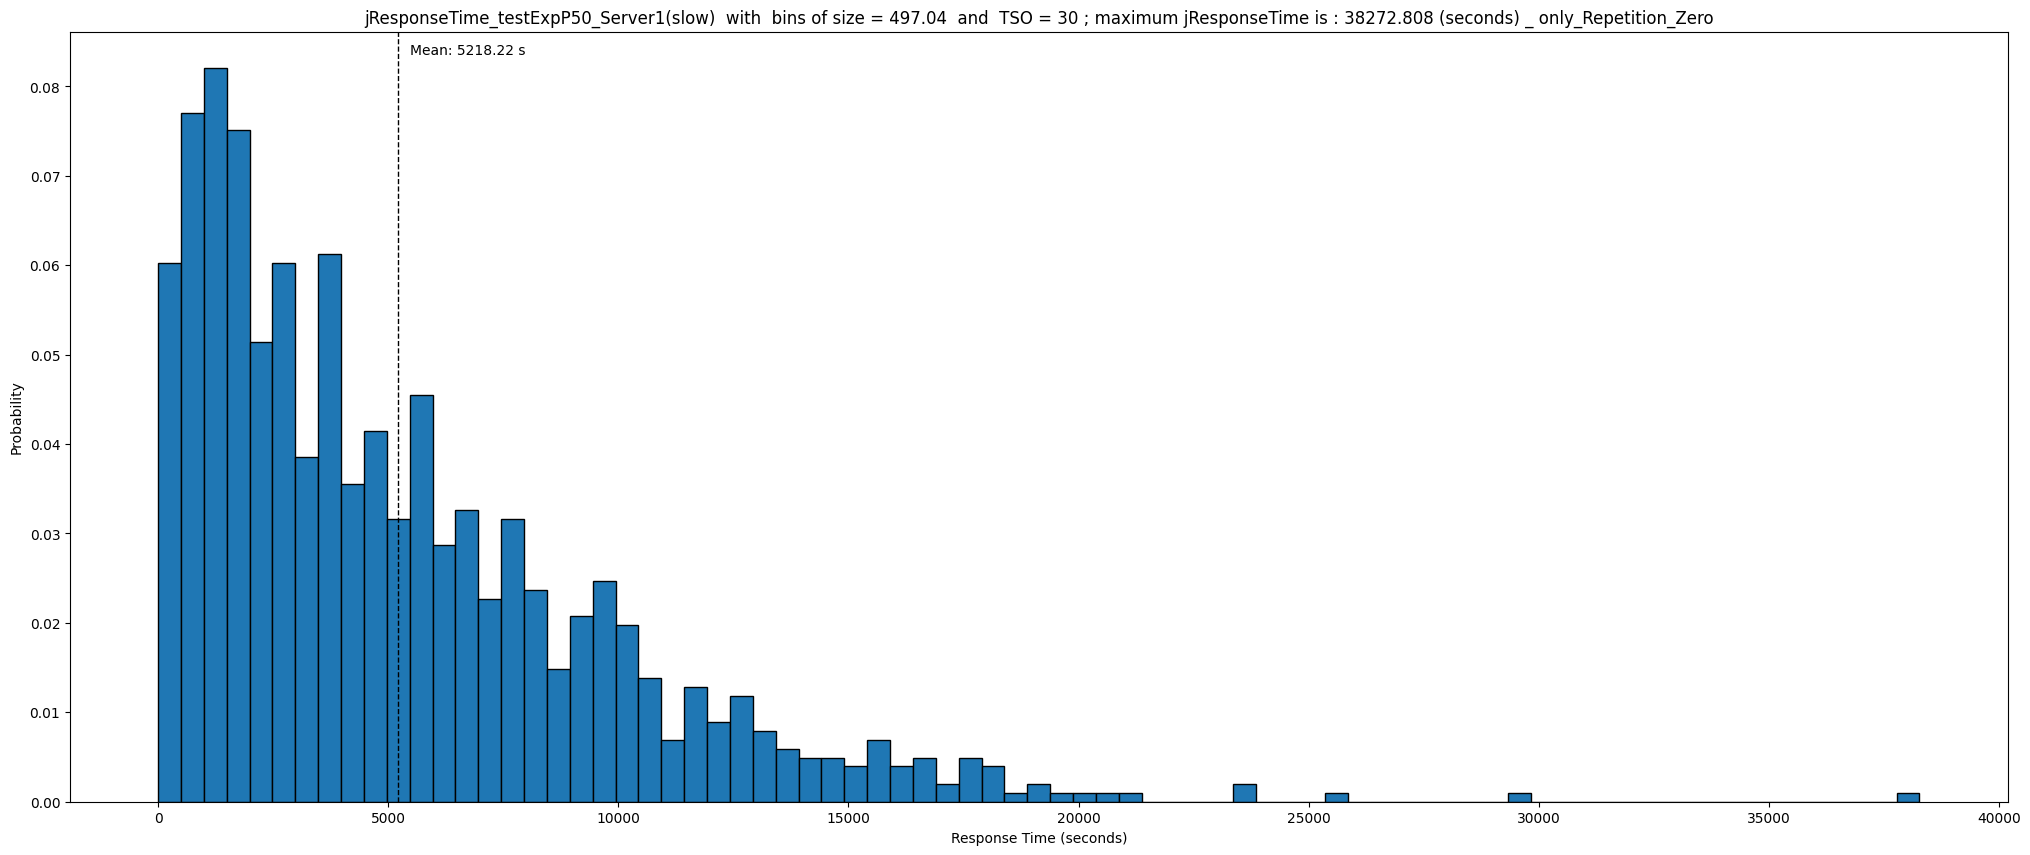

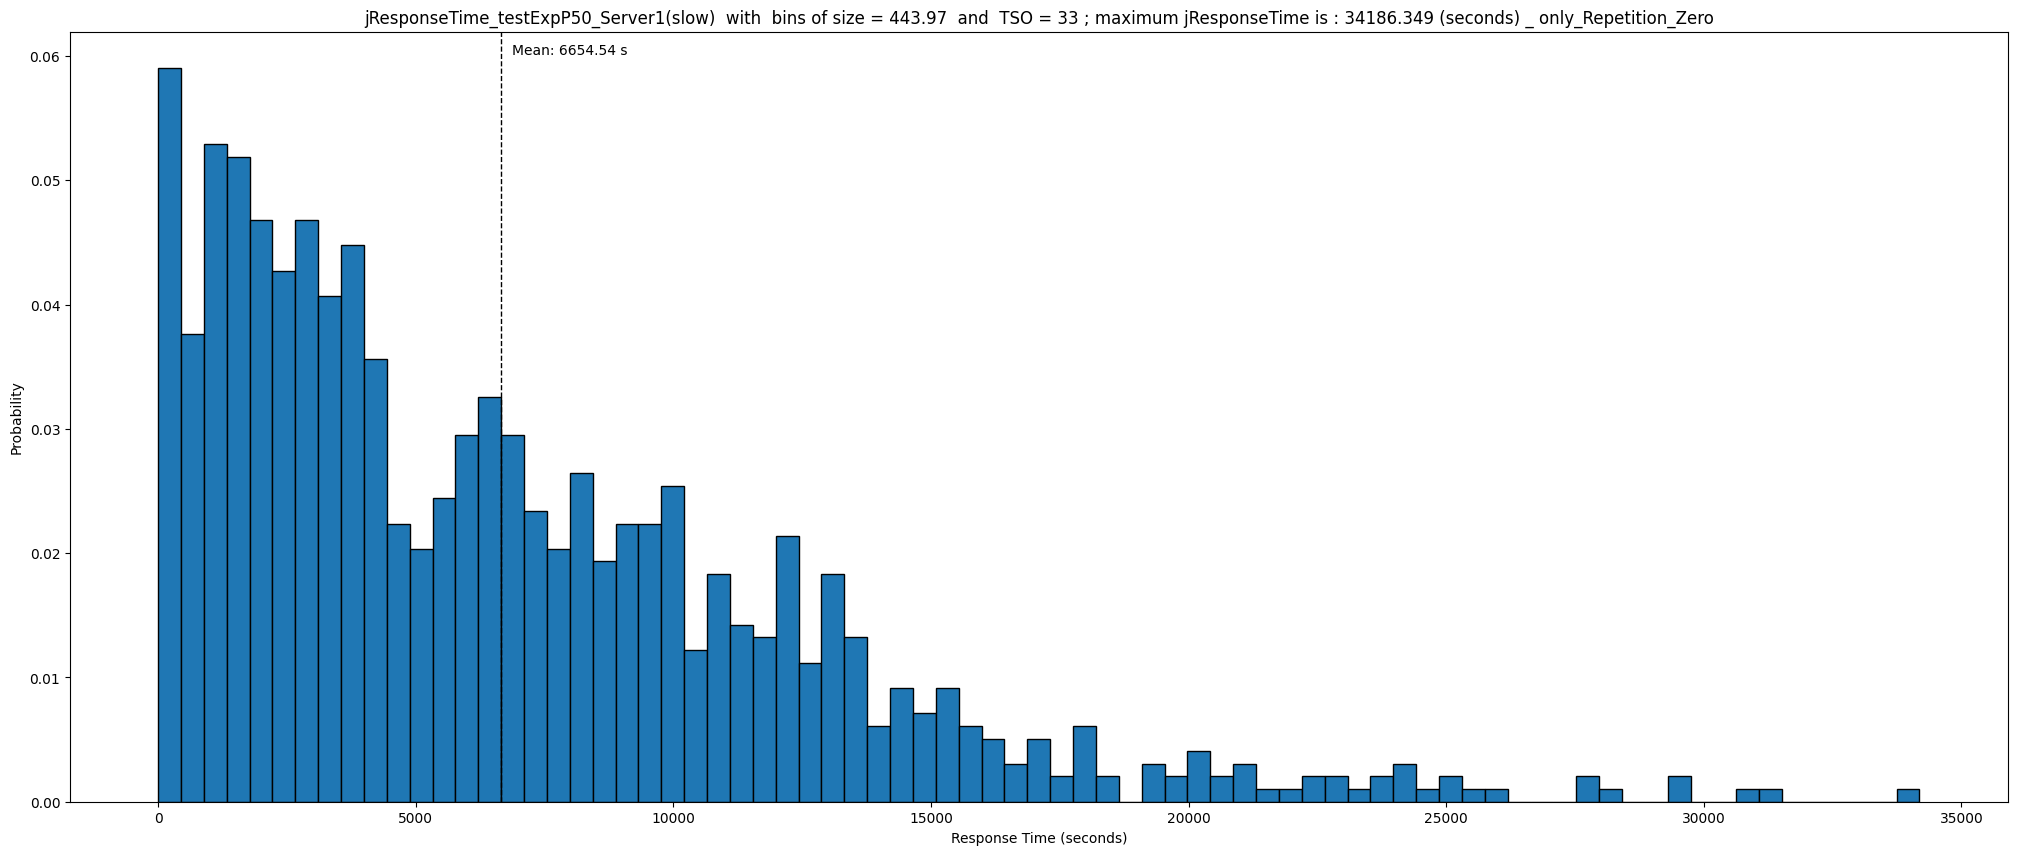

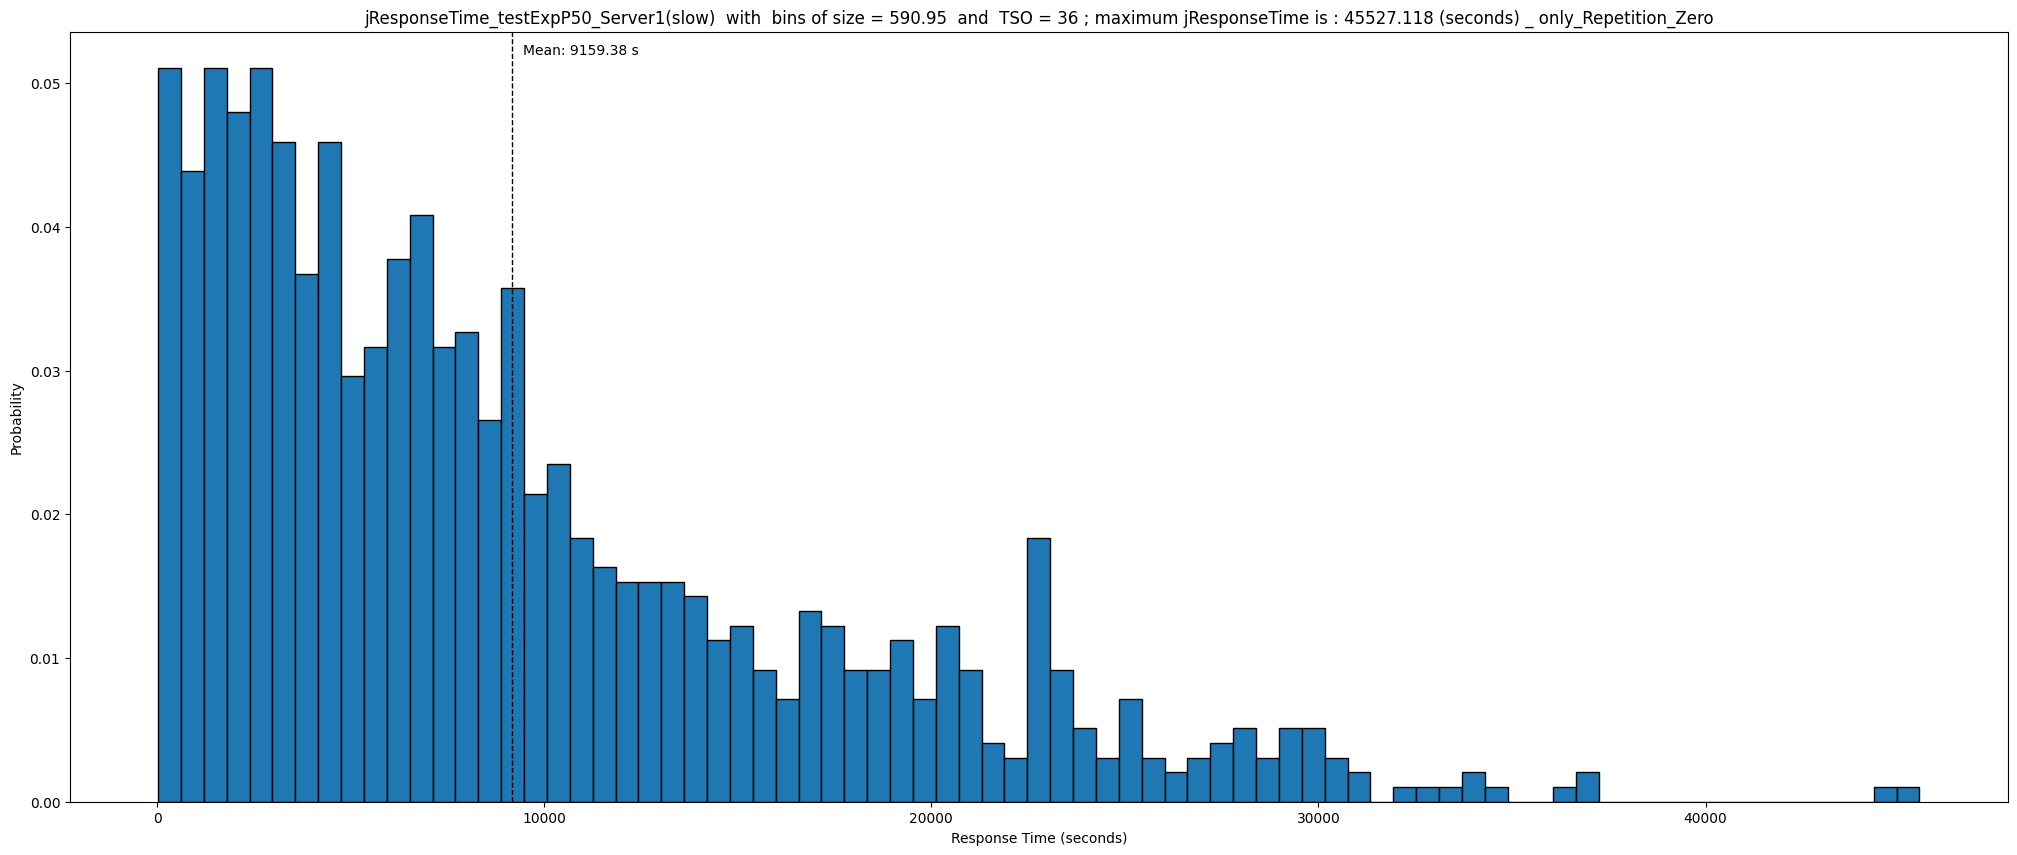

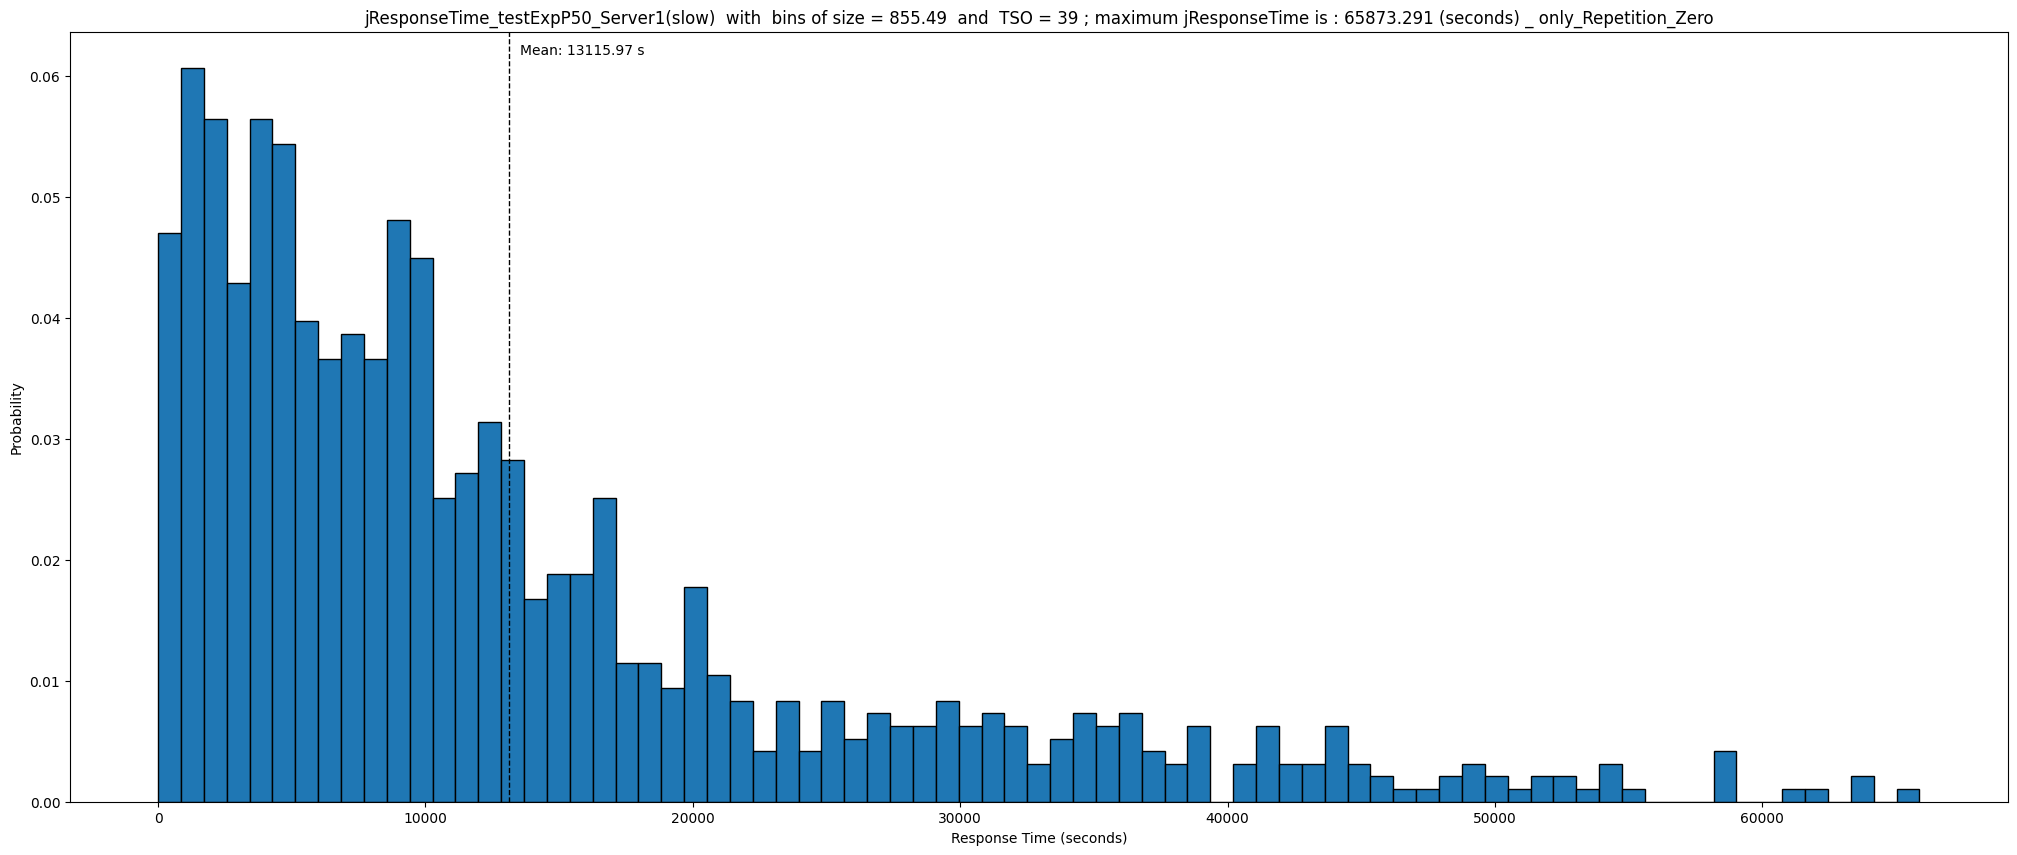

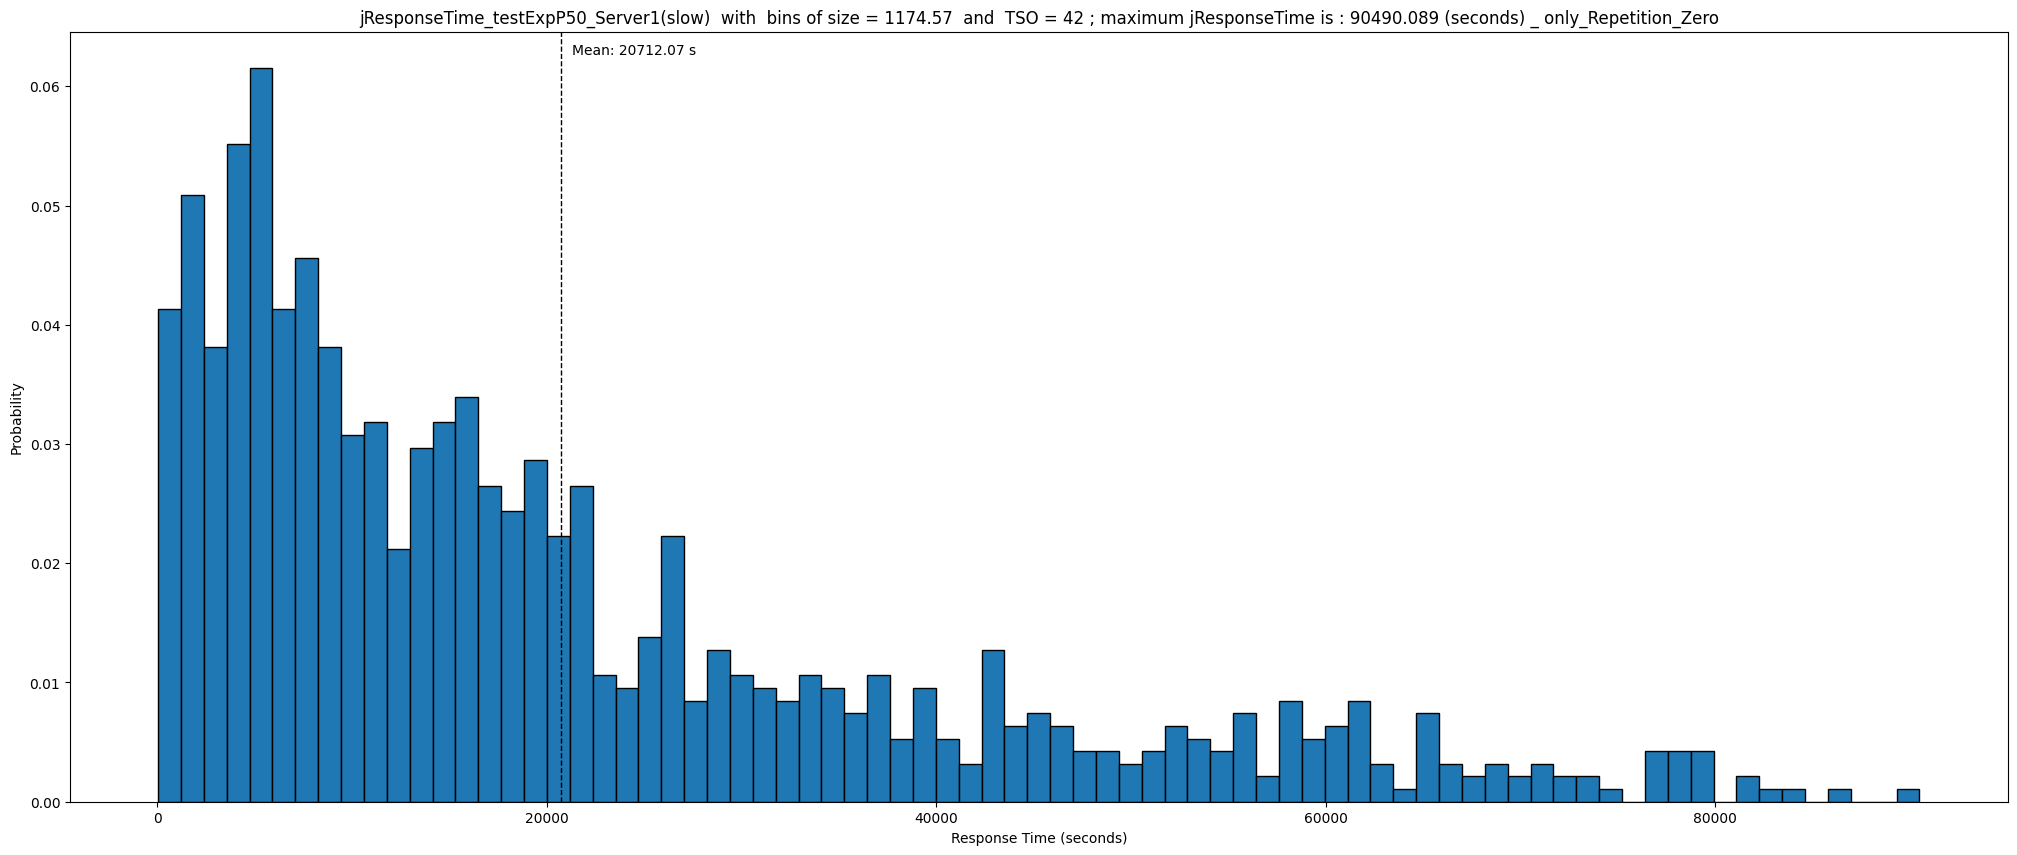

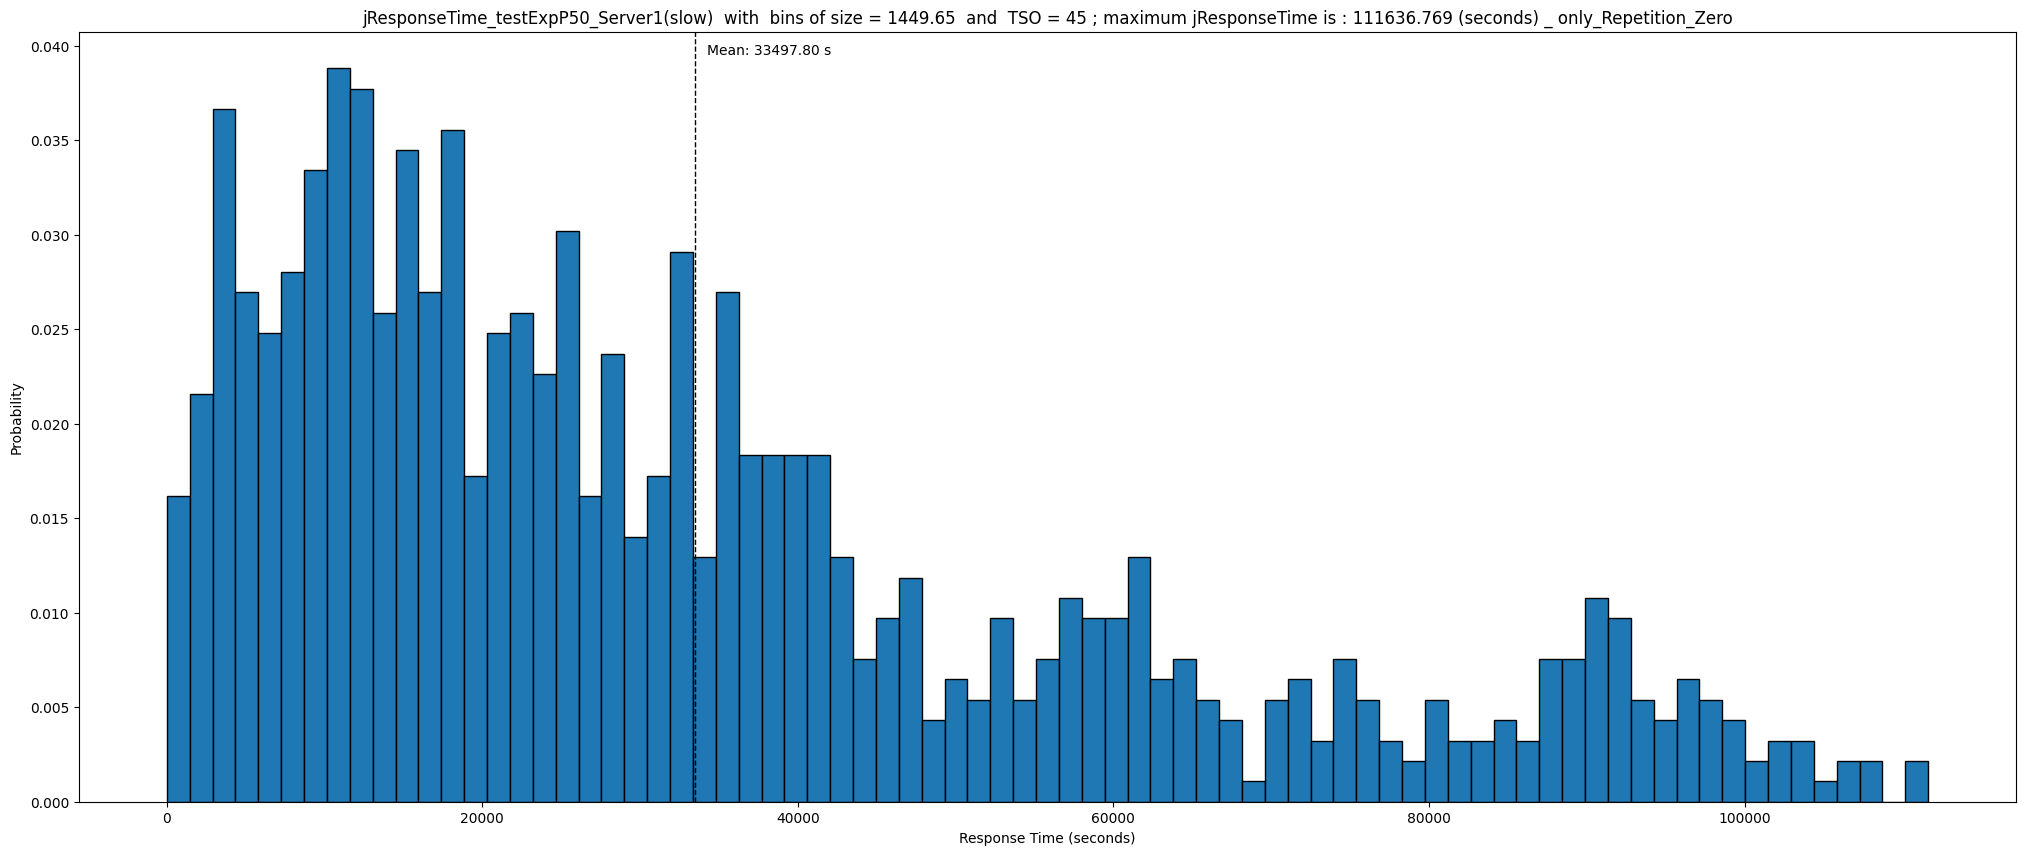

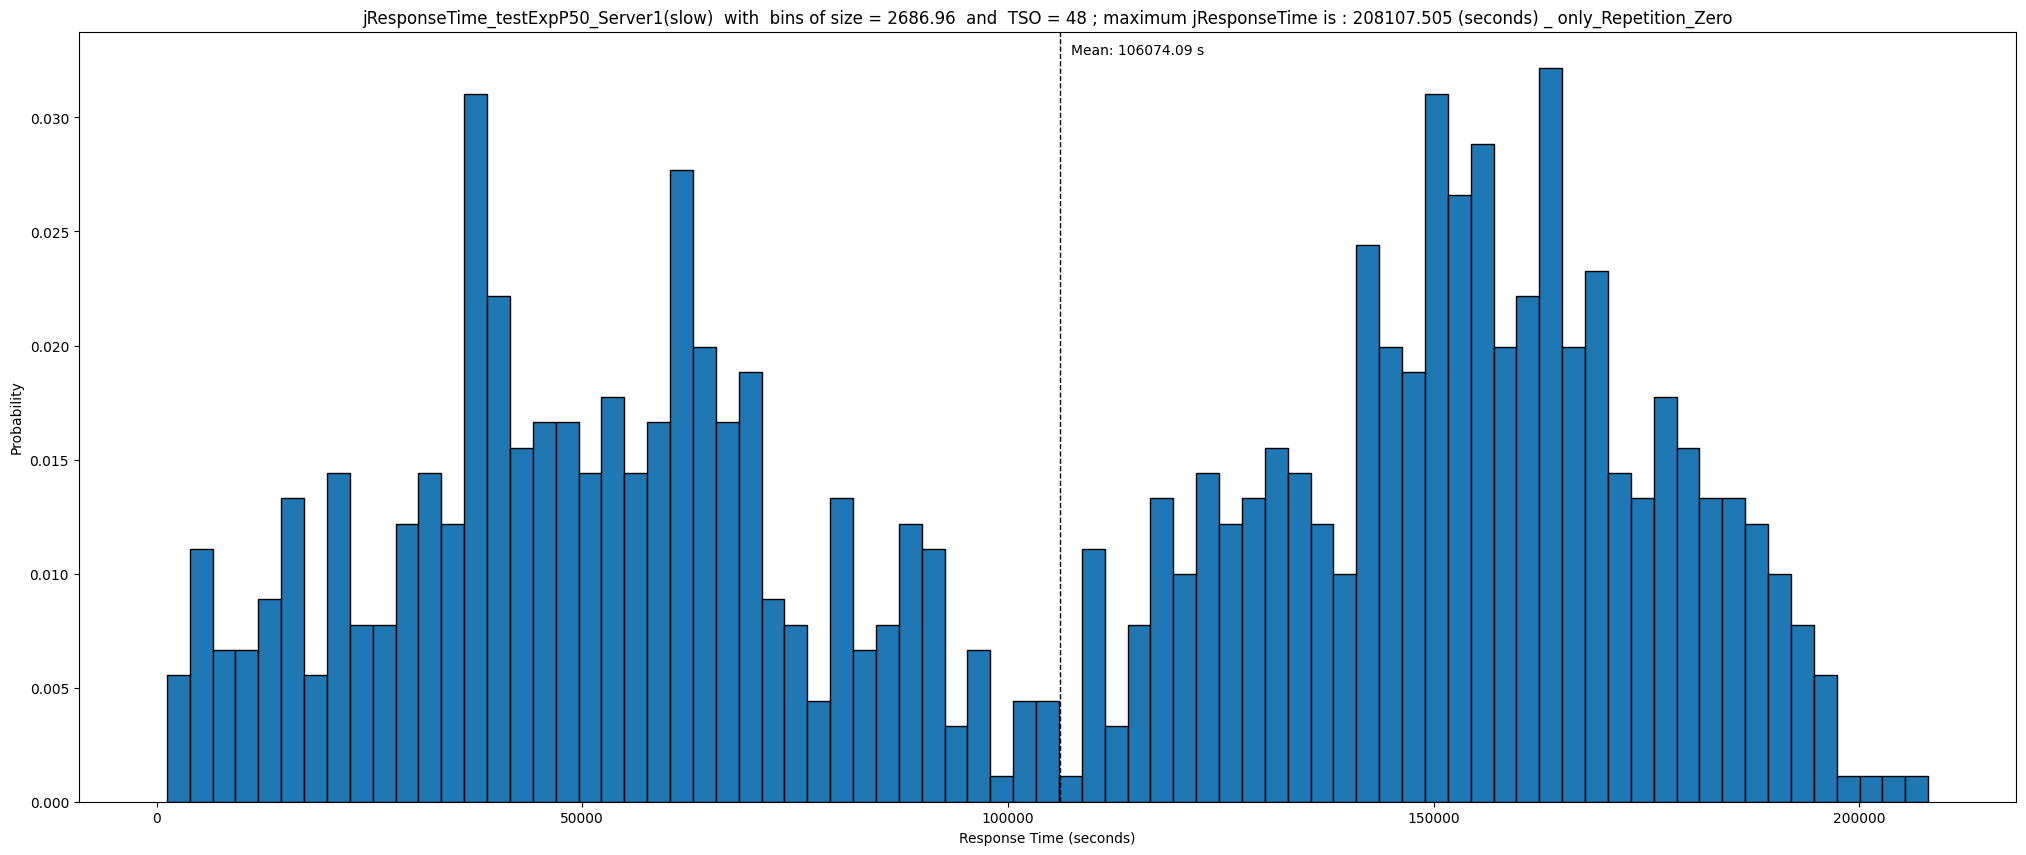

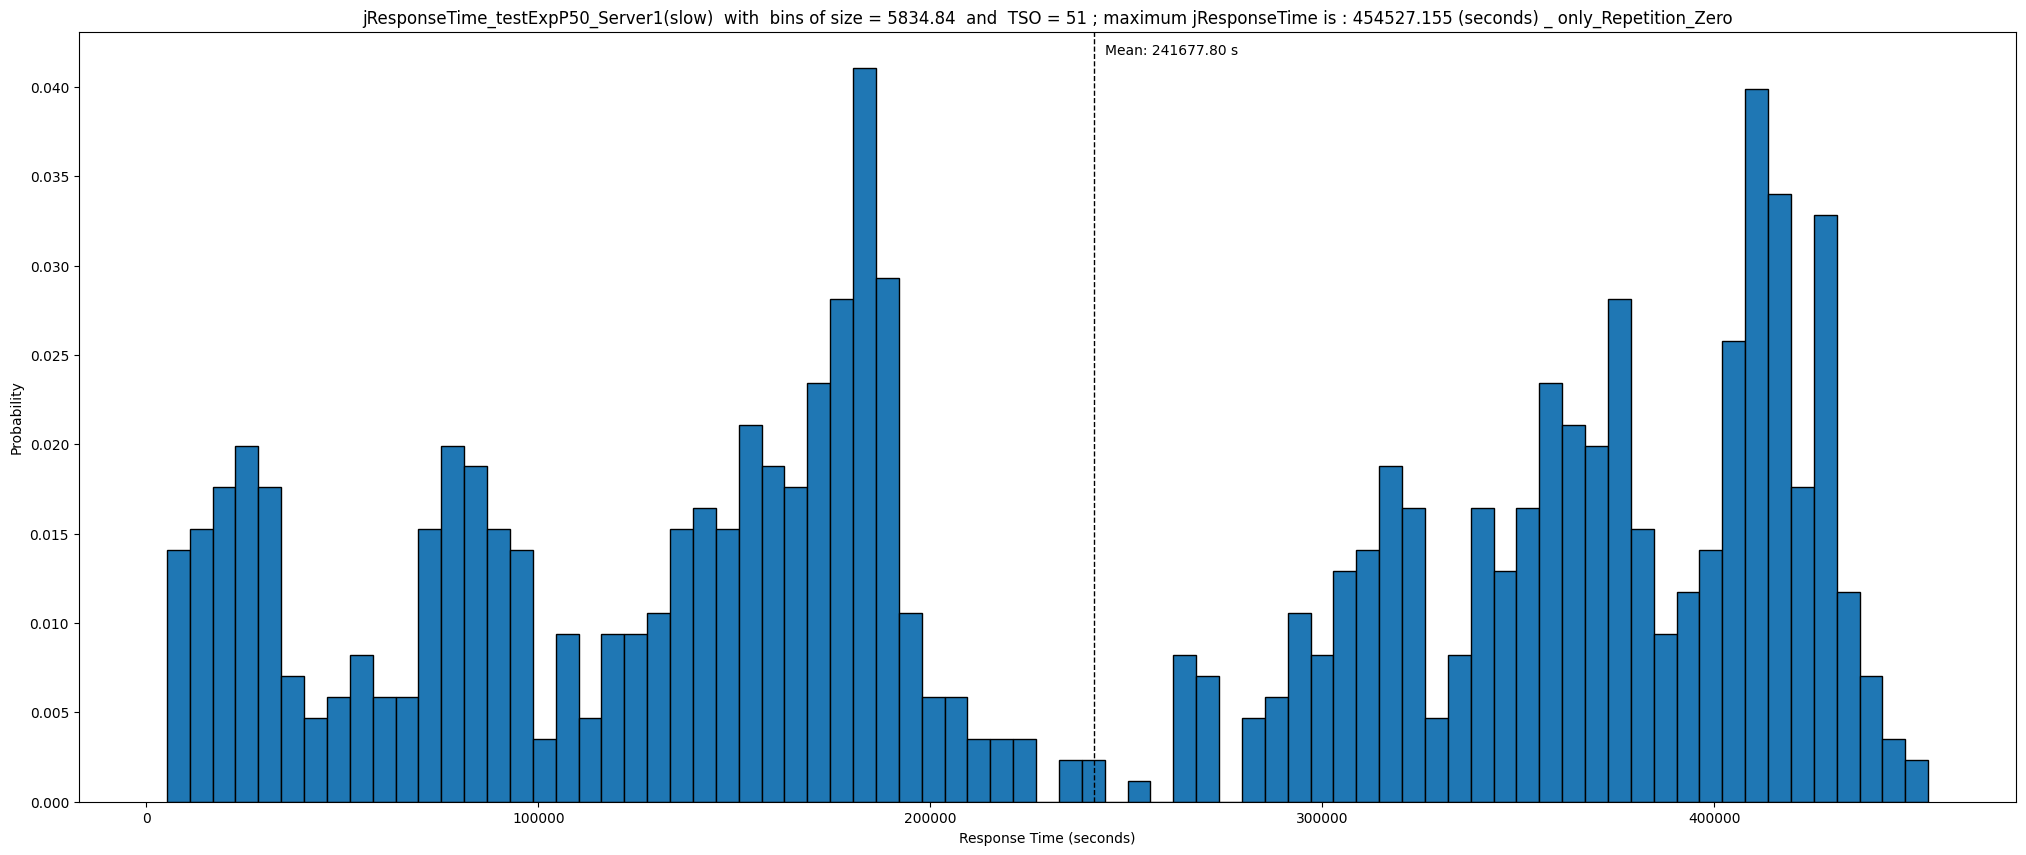

In [10]:
maximum_bins_number = 77

plot_dir = f'../images/plots' 
for srvn in range(0, len(server_names)):
    for tso_this_iter in range(0, len(target_tso), 1) :
        plt.rcParams["figure.figsize"] = (25, 10)
        

        massimo_jResTime = float( max(general_nums[srvn][tso_this_iter]) )
        #   print("massimo_jResTime : ", massimo_jResTime)
        #   bin_size_chosen = 35
        #   if int(target_tso[tso_this_iter]) > 30 and use_exp == False:
        #       bin_size_chosen = int(maximum_bins_number)
        #   print("bin_size_chosen is : ", bin_size_chosen)
        
        counts, bins = np.histogram( general_nums[srvn][tso_this_iter], bins = maximum_bins_number )

        counts = counts / len( general_nums[srvn][tso_this_iter] ) # normalize count
        #   print("counts : ", counts)
        #   print("bins : ", bins)

        #   #   my_massimo_jResTime = max(general_nums[srvn][tso_this_iter])
        #   #   my_bins = []
        #   #   my_counts = []
        #   #   for it in range(0, my_massimo_jResTime+1):
        #   #       #   print("it : ", it)
        #   #       my_bins.append(it-0.5)
        #   #       my_counts.append(0.0)
        #   #       
        #   #   for it in range(0, len(general_nums[srvn][tso_this_iter])):
        #   #       my_counts[general_nums[srvn][tso_this_iter][it]] += 1
        #   #   for it in range(0, len(my_counts)):
        #   #       my_counts[it] = my_counts[it]/len(general_nums[srvn][tso_this_iter])
        #   #   #   print(my_counts)
        #   #   my_bins.append(my_bins[-1]+1)
        #   #   #   print(my_bins)

        bin_width = bins[1]-bins[0]
        hbw = bin_width / 2
        #   bins = bins - hbw

        plt.hist(bins[:-1], bins, weights=counts, edgecolor='black')
        ax = plt.gca()
        ax.yaxis.get_major_formatter().set_scientific(False)
        ax.yaxis.get_major_formatter().set_useOffset(False)
        ax.xaxis.get_major_formatter().set_useOffset(False)
        ax.xaxis.get_major_formatter().set_scientific(False)

        extras = ["fast", "slow"]
        #   plt.hist(counts)
        name = f'jResponseTime_test{distribution}P{probability}_Server{srvn}({extras[srvn]})'
        if use_all == True: 
            plt.title(f"{name}  with  bins of size = {bins[1]-bins[0]:.2f}  and  TSO = {target_tso[tso_this_iter]} ; maximum jResponseTime is : {massimo_jResTime} (seconds) _ use_All_Repetitions")
        else : 
            plt.title(f"{name}  with  bins of size = {bins[1]-bins[0]:.2f}  and  TSO = {target_tso[tso_this_iter]} ; maximum jResponseTime is : {massimo_jResTime} (seconds) _ only_Repetition_Zero")
        
        #   if bin_size_chosen < 50:
        #       plt.xticks(range(0, bin_size_chosen+1 , 1))
        #   if bin_size_chosen < 100:
        #       plt.xticks(range(0, bin_size_chosen+1 , 2))
        #   elif bin_size_chosen < 200:
        #       plt.xticks(range(0, bin_size_chosen+1 , 5))
        #   elif bin_size_chosen < 400:
        #       plt.xticks(range(0, bin_size_chosen+1 , 10))
        #   elif bin_size_chosen < 800:
        #       plt.xticks(range(0, bin_size_chosen+1 , 20))
        
        plt.ylabel("Probability")
        plt.xlabel("Response Time (seconds)")
        

        # print mean !
        target_asNpArray = np.array(general_nums[srvn][tso_this_iter])
        target_mean = target_asNpArray.mean()

        plt.axvline( target_mean , color='k', linestyle='dashed', linewidth=1 )
        min_ylim, max_ylim = plt.ylim()
        
        text_mean_location = target_mean + hbw
        plt.text( text_mean_location, max_ylim*0.97, 'Mean: {:.2f} s'.format(target_mean))


        save = False
        endingPNG = ".png"
        if detailed == True:
            endingPNG = "_isDetailed.png"
        if save == True:
            if use_all == True: 
                plt.savefig(f'{plot_dir}/jResTime_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{srvn}{endingPNG}')
            else :
                plt.savefig(f'{plot_dir}/jResTime_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{srvn}{endingPNG}')
        
        plt.show()
    

In [11]:
import scipy.stats as sp_st
import matplotlib.pyplot as plt
import itertools as it

In [33]:
nth_quantile = {
	"expon" : sp_st.expon.ppf
	, "norm" : sp_st.norm.ppf 
	#	, "pareto" : sp_st.pareto.ppf
}



def qqplot(data, dist="expon"):
	n = len(data)
	plt.plot([nth_quantile[dist]((j+0.5)/n) for j in range(n)], sorted(data), 'o')
	plt.plot(plt.xlim(), plt.ylim(), "--", color="lightgrey")

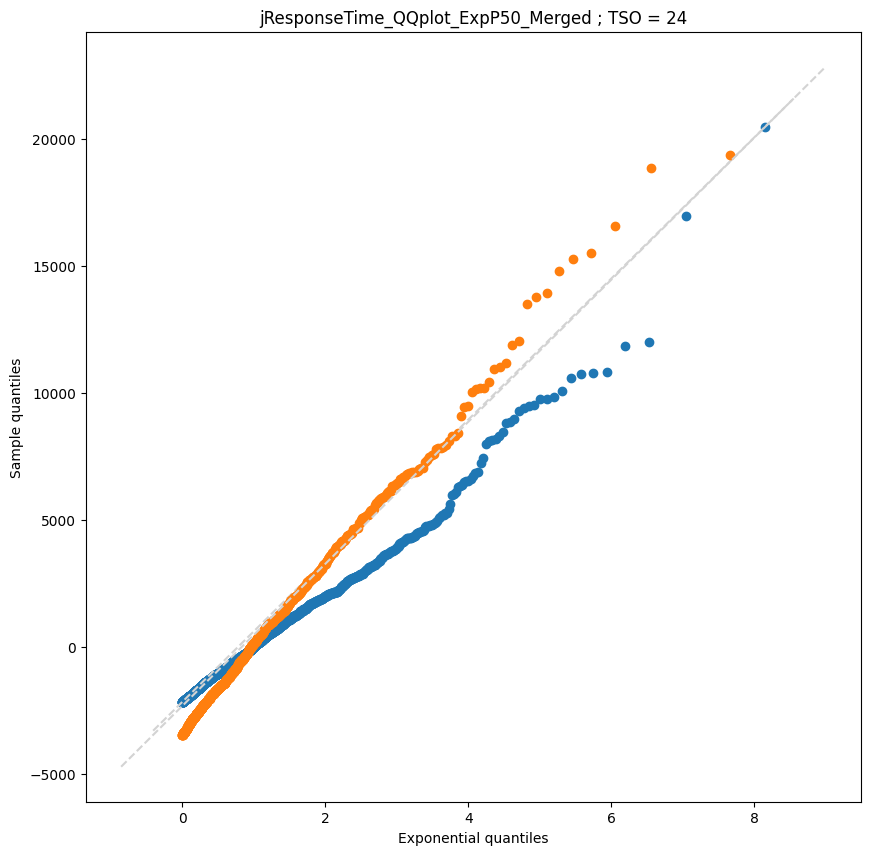

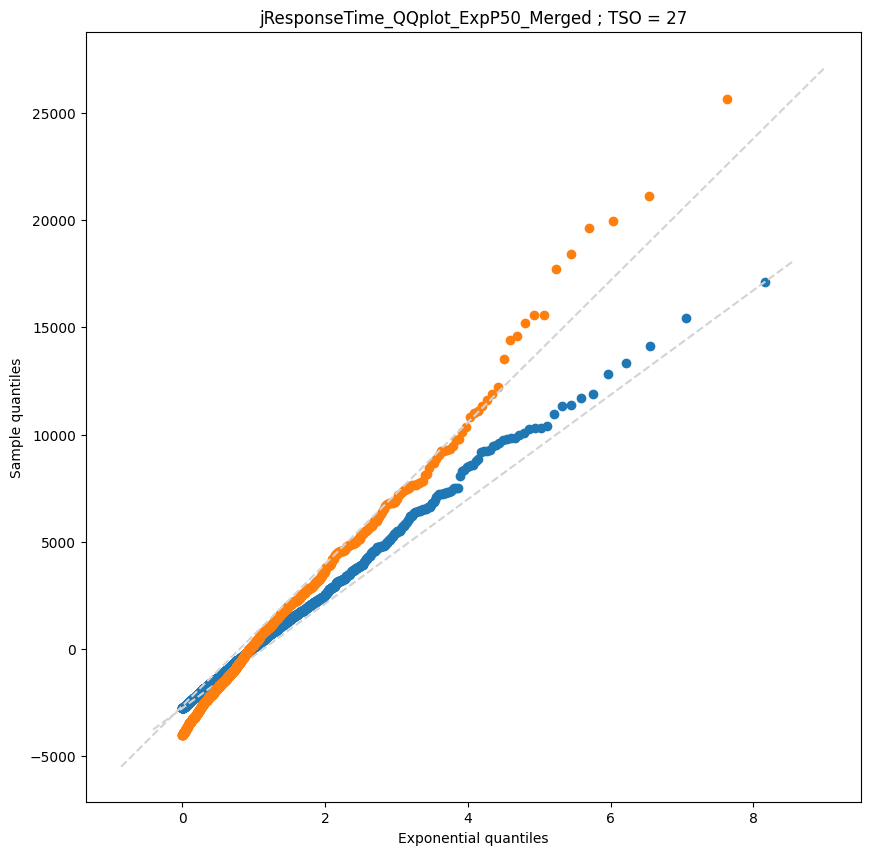

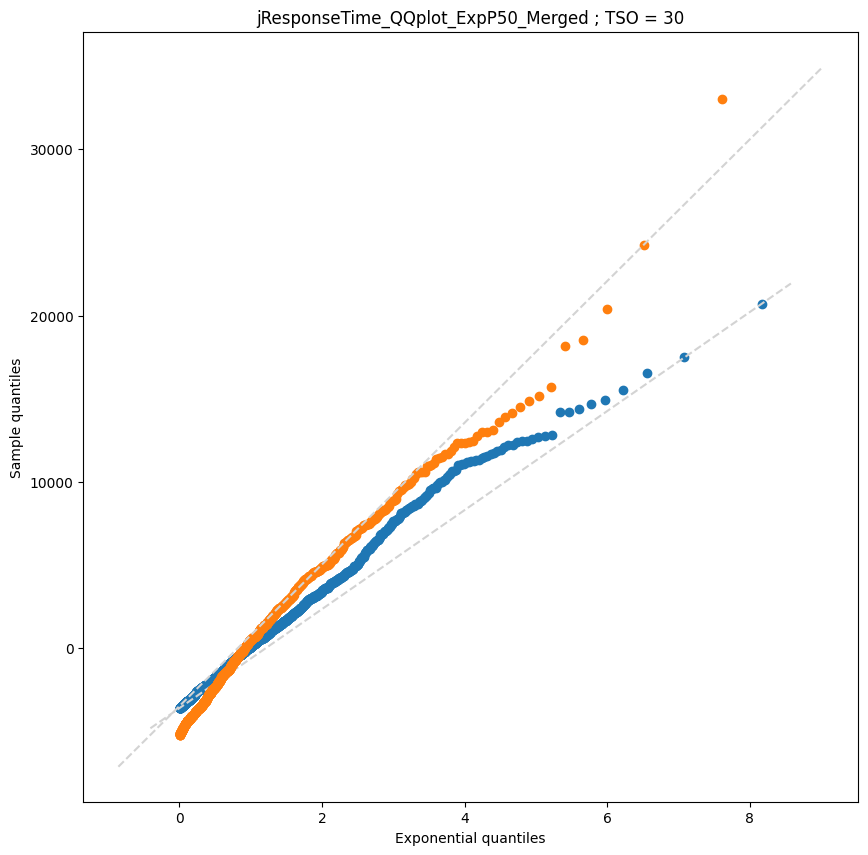

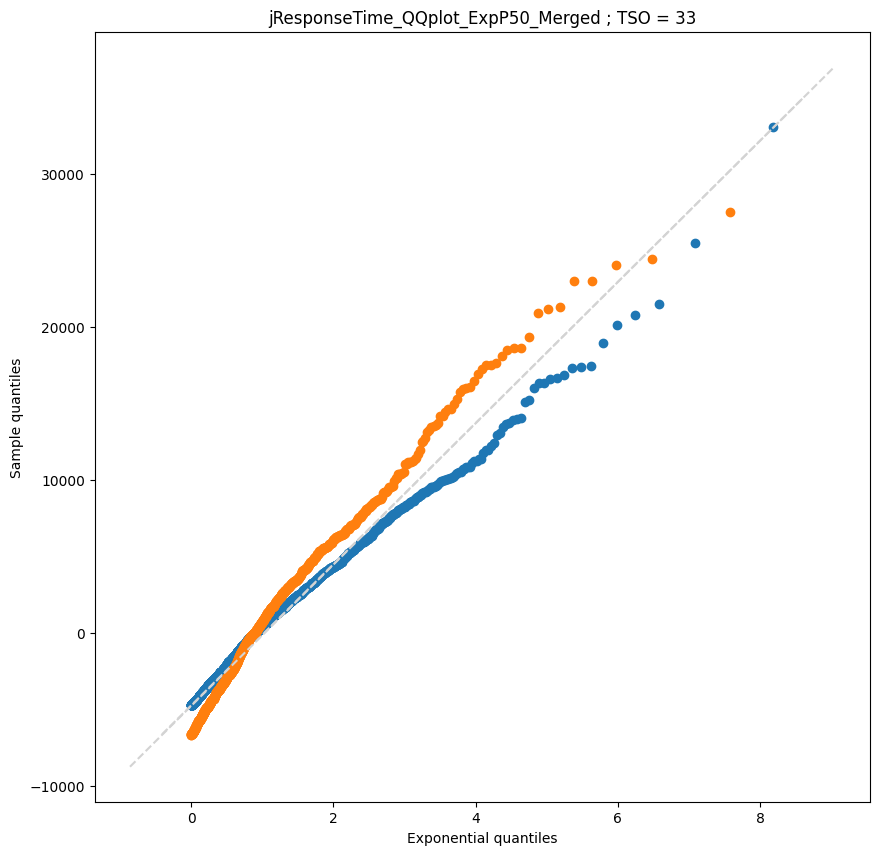

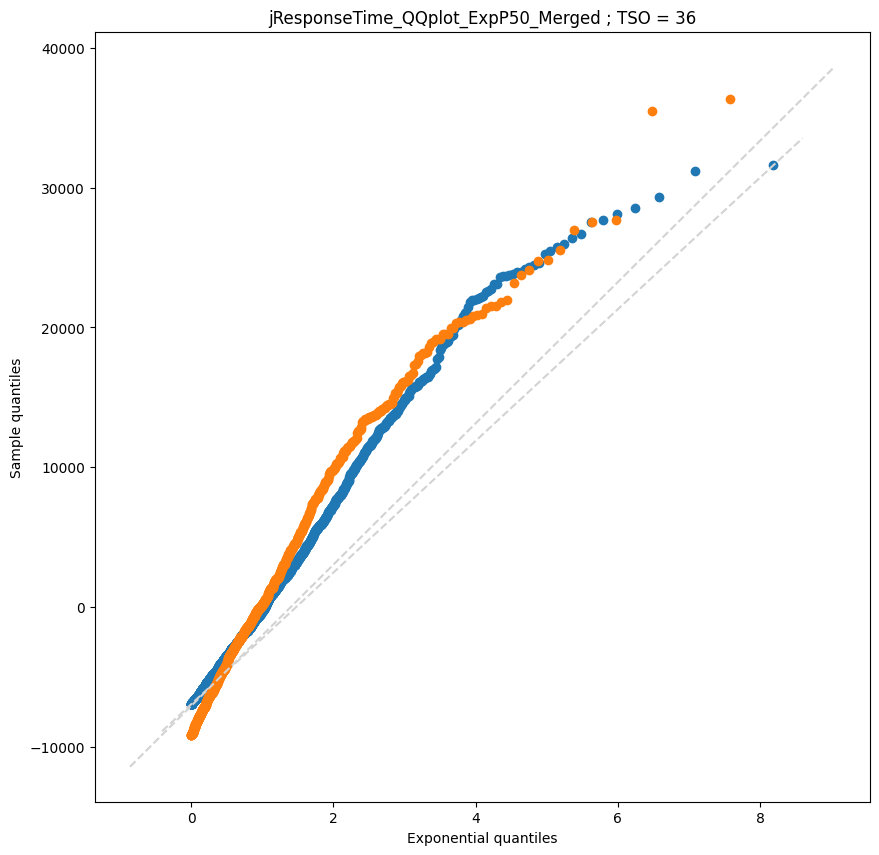

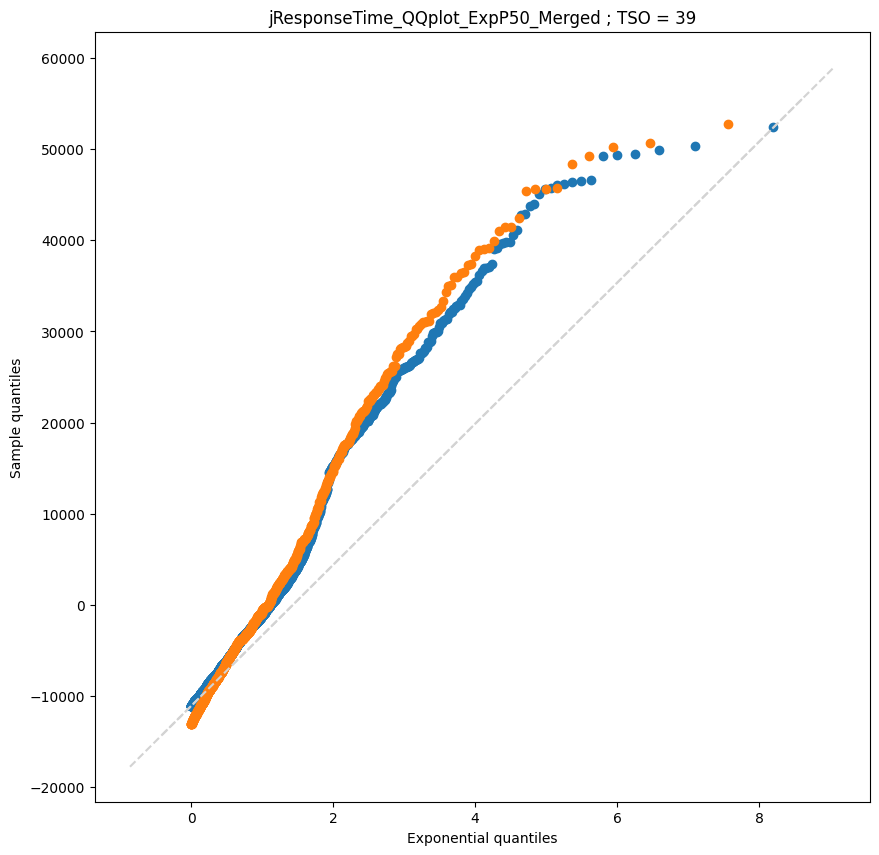

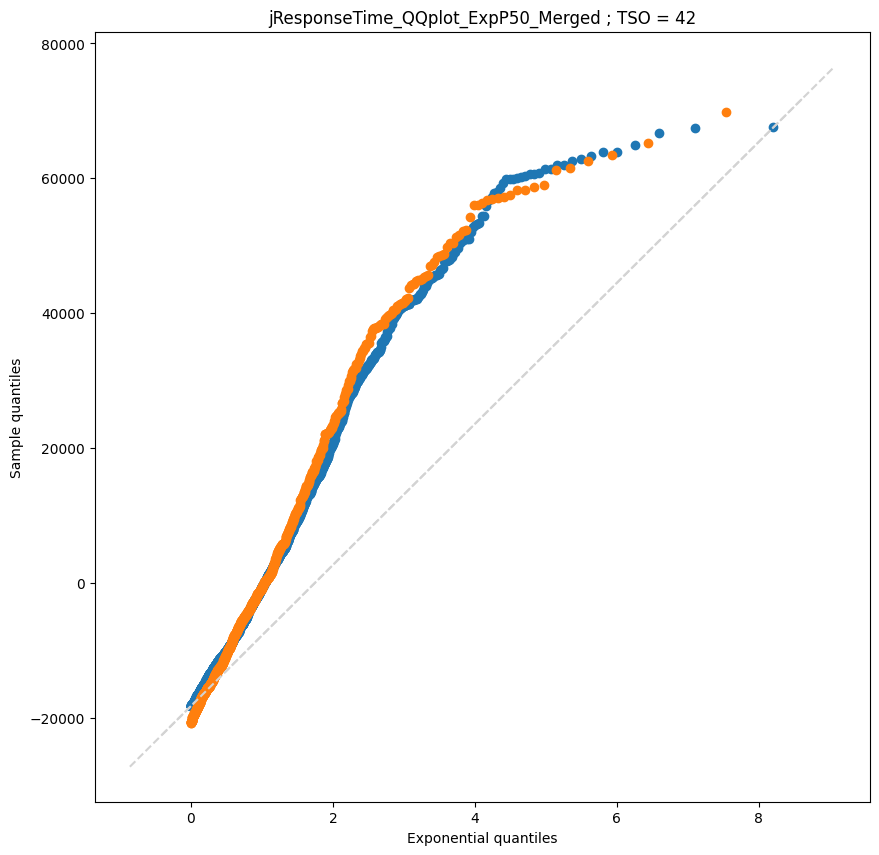

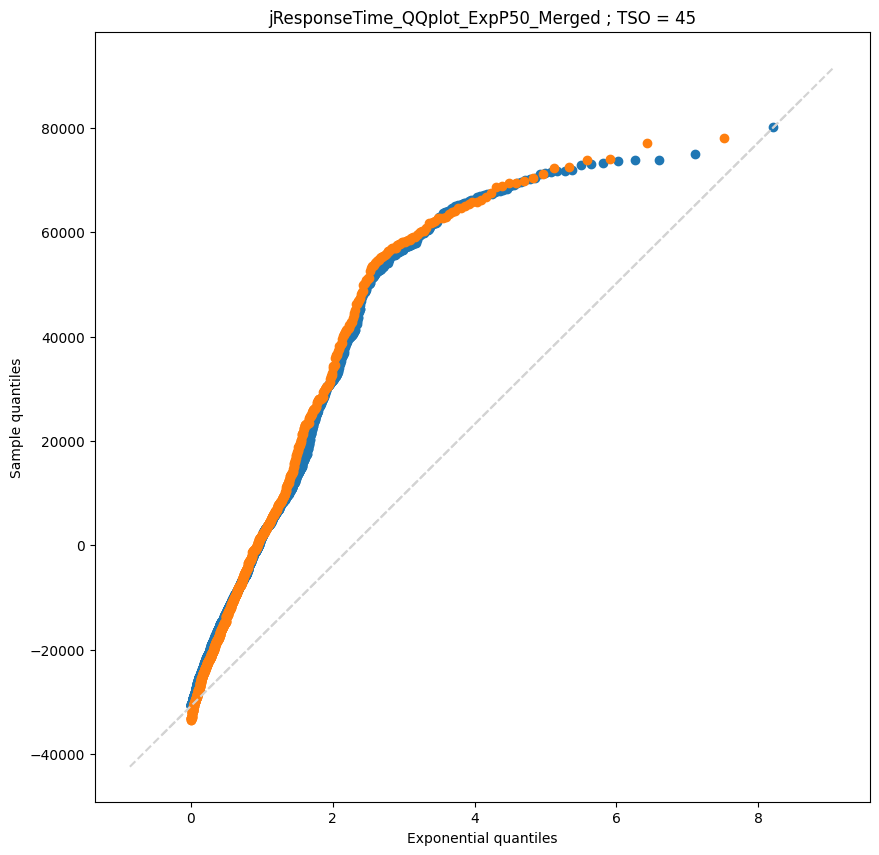

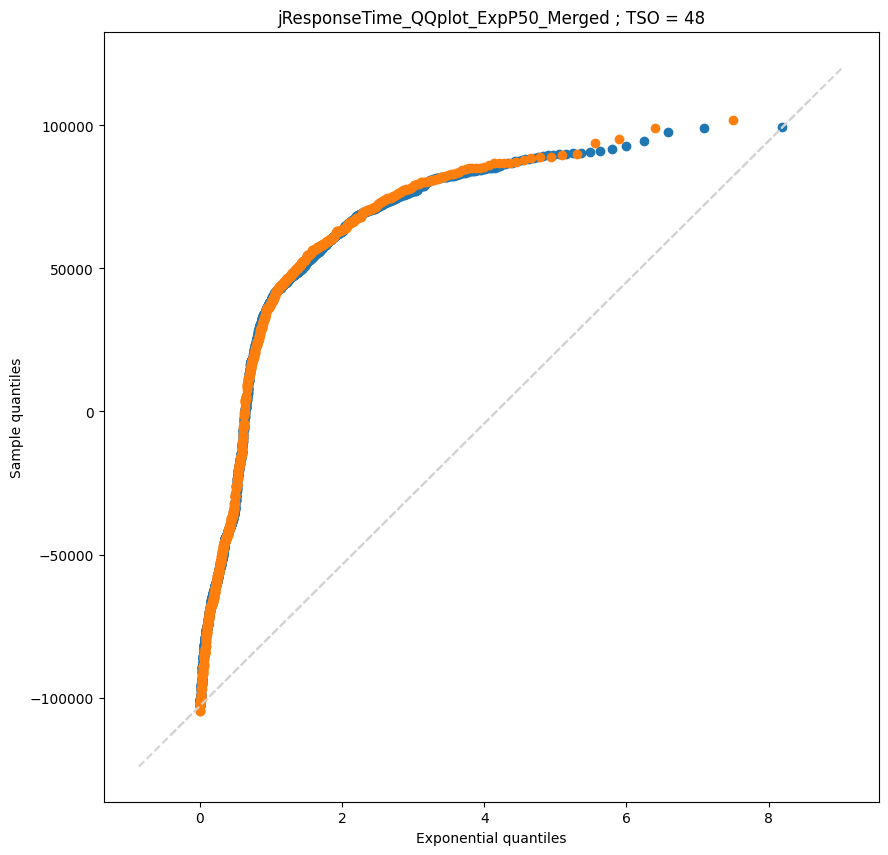

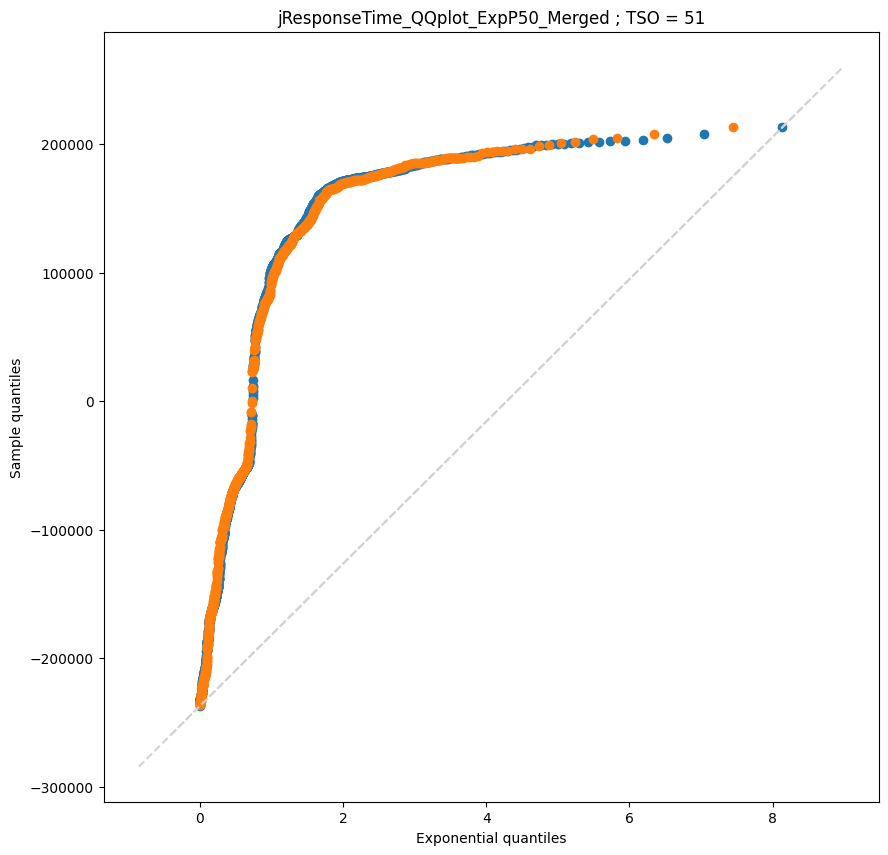

In [34]:
merged = True
save = False
if merged == True :
    merged_name = "Merged"
    for tso_this_iter in range(0, len(target_tso), 1 ) :
        plt.rcParams["figure.figsize"] = (10, 10)
        for srvn in range(0, len(server_names), 1 ):

            name = f'jResponseTime_QQplot_{distribution}P{probability}_{merged_name}'

            d = np.array( general_nums[srvn][tso_this_iter] )
            data_mean = d.mean()
            d = d - data_mean
            #   dd = list(it.chain(*[np.mean(v) - v for v in d]))
            #   qqplot(dd)

            qqplot(d)
            
            plt.title(f'{name} ; TSO = {target_tso[tso_this_iter]}')

            plt.ylabel("Sample quantiles")
            plt.xlabel("Exponential quantiles")

            #   save = False
            endingPNG = ".png"
            if detailed == True:
                endingPNG = "_isDetailed.png"
            if save == True:
                if use_all == True: 
                    plt.savefig(f'{plot_dir}/jResponseTime_QQplot_{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{merged_name}{endingPNG}')
                else :
                    plt.savefig(f'{plot_dir}/jResponseTime_QQplot_{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{merged_name}{endingPNG}')
            

        plt.show()
else :
    for srvn in range(0, len(server_names), 1 ):
        for tso_this_iter in range(0, len(target_tso), 1 ) :
            plt.rcParams["figure.figsize"] = (10, 10)

            name = f'jResponseTime_QQplot_{distribution}P{probability}_Server{srvn}({extras[srvn]})'

            d = np.array( general_nums[srvn][tso_this_iter] )
            data_mean = d.mean()
            d = d - data_mean
            #   dd = list(it.chain(*[np.mean(v) - v for v in d]))
            #   qqplot(dd)
            qqplot(d)
            plt.title(f'{name} ; TSO = {target_tso[tso_this_iter]}')

            plt.ylabel("Sample quantiles")
            plt.xlabel("Exponential quantiles")

            #   save = False
            endingPNG = ".png"
            if detailed == True:
                endingPNG = "_isDetailed.png"
            if save == True:
                if use_all == True: 
                    plt.savefig(f'{plot_dir}/jResponseTime_QQplot_{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{srvn}{endingPNG}')
                else :
                    plt.savefig(f'{plot_dir}/jResponseTime_QQplot_{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{srvn}{endingPNG}')
            

            plt.show()
